(theory-to-practice)=
# Connecting theory to practice: a first look at model building

Essentially everything that we have studied so far in class belongs to abstract probability theory, though you investigated some real-world datasets and scenarios in the [programming assignments](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments). In this chapter, we take a first look at _probabilistic modeling_, continuing the discussion that we began in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) on _empirical distributions_. The ultimate goal is to begin connecting our abstract theory to real-world practice.

The modeling concept is bigger than just probability theory, statistics, and machine learning; indeed, the process of (mathematical) model building is central to essentially all quantitative sciences:

```{image} ../img/model-build.svg
:width: 80%
:align: center
```
&nbsp;

Popular stories in the history of western science tell of the search for better and more accurate physical models---the transition from the geocentric Ptolemaic model of the solar system to the heliocentric Copernican one immediately springs to mind as an example.

Mathematical models serve multiple functions in science: an accurate model may be used to test hypotheses, and it may be used to predict future events. Prediction is a form of _data generation_, since the predictions often come in the form of

## Data and random samples

This chapter is a continuation of the ideas presented in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) where we began exploring how the concepts that we have been studying over the past few chapters apply to _real-world_ datasets. In that assignment, we learned about _empirical distributions_ of datasets and associated empirical quantities like means, variances, and quantiles. We will continue making the connection between theory and practice by exploring some further methods and techniques for real-world data analysis, as well as catch a first glimpse of _probabilistic models_, which we will study in much more depth in {numref}`Chapter %s <prob-models>`.

Our exploration in the third programming assignment centered on the _Ames housing dataset_. In this chapter, we will explore a dataset related to Airbnbs. In particular, we have at hand a sample of listing prices (in USD) for Airbnbs in Austin, Texas, over the last 12 months:

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
mpl.rcParams['figure.dpi'] = 600
warnings.filterwarnings("ignore")

srs = pd.read_csv('../aux-files/austin_sample.csv', usecols=['price']).squeeze()
srs

0        44.01
1        32.83
2       112.50
3        31.76
4       104.05
         ...  
3967    212.17
3968    200.25
3969    382.34
3970    199.20
3971    149.58
Name: price, Length: 3972, dtype: float64

```{margin}
This is a subset of a larger dataset obtained [here](http://insideairbnb.com). The dataset originally consisted of integer prices, but for pedagogical reasons I want the prices to  more closely resemble a continuous variable. Thus, I added random fractions of a dollar onto each price.
```

Though the sample consists of quite a few prices ($m=3{,}972$ of them, in fact), it does not represent _all_ prices. In fact, there were a little over 14,500 total listings during the time period from which our sample was drawn.

To fit this into our theoretical framework, we conceptualize the collection of *all* 14,500 listings as a probability space $S$. (I will talk about the associated probability measure below.) Then, we conceptualize the price of a listing as a random variable

\begin{equation*}
X: S \to \mathbb{R}
\end{equation*}

which takes a listing from the population $S$ as input and spits out its price:

\begin{equation*}
X(\text{listing}) = \text{price}.
\end{equation*}

The actual prices in our sample are called *observed values* of the random variable $X$ and, as in previous chapters, they are represented with a lowercase $x$. We would list the elements in our sample as

\begin{equation*}
x_1,x_2,\ldots,x_m \in \mathbb{R}
\end{equation*}

where $m=3{,}972$.

So far, this discussion is not all that different from ones that we have had before; in fact, I can even use the same cartoon from previous chapters to visualize the action of the random variable $X$:

```{image} ../img/airbnb0.svg
:width: 90%
:align: center
```
&nbsp;

However, what makes our current scenario different from those considered in past chapters is that we have an entire sample of prices at hand, not just a *single* price. How are we to fit *samples* and *datasets* into our theoretical framework?

The answer is pretty obvious, actually. After all, a collection of $m$ prices like those in our sample must come from a collection of $m$ listings, right? This suggests that we should simply duplicate the random variable $X$ to obtain a *sequence* of random variables

\begin{equation*}
X_1,X_2,\ldots,X_m,
\end{equation*}

where the random variable $X_i$ (for $1\leq i \leq m$) spits out the price of the $i$-th listing. Something like:

```{image} ../img/cartesian.svg
:width: 90%
:align: center
```
&nbsp;

To make this work, technically we need to replace the sample space $S$ with its $m$-fold <a href="https://en.wikipedia.org/wiki/Cartesian_product#n-ary_Cartesian_power">cartesian power</a>, but we won't worry about these details. For us, it's enough to understand this process at the intuitive level.

Now, what about probability? Remember, I called the population $S$ of all listings a *probability* space, so evidently it must come equipped with a probability measure $P$. But here's the truth:

> We don't actually *care* about $P$.

Indeed, $P$ is a purely academic object whose only role in this business is to make the theory under the hood tick along. It's mostly pure mathematicians like me that spend time worrying about $P$, but it is *never*, *ever* mentioned or acknowledged in real-world scenarios.

On the other hand, we do very much(!) care about the probability distributions of the random variables $X_1,X_2,\ldots,X_m$. We will be devoting a huge amount of time and effort over the rest of this course trying to figure out the distribution of this or that random variable. In the context of our Airbnb prices, the distributions of the $X_i$'s tell us the distribution of prices:

```{image} ../img/airbnb.svg
:width: 90%
:align: center
```
&nbsp;

But because each of the random variables $X_i$ is essentially a "duplicate" of the single 'price' random variable $X$, they all have the *same* distribution, in the sense that

\begin{equation*}
P(X_1\in A) = P(X_2\in A) = \cdots = P(X_m\in A)
\end{equation*}

for all events $A\subset \mathbb{R}$. If we draw each of the random variables along with their distributions, we would get:

```{image} ../img/iid.svg
:width: 100%
:align: center
```
&nbsp;

Notice that all the distributions are the same! This leads us to one of the main definitions in this entire course:

```{prf:definition}
:label: random-sample-defn

Let $X_1,X_2,\ldots,X_m$ be a sequence of random variables, all defined on the same probability space.

* The random variables are called a *random sample* if they are *independent* and *identically distributed* (IID).

Provided that the sequence is a random sample, an *observed random sample*, or a *dataset*, is a sequence of real numbers $x_1,x_2,\ldots,x_m$ where $x_i$ is an observed value of $X_i$.
```

Two random variables are said to be *independent* if the probability of one of the random variables taking a particular value is not influenced or affected by the other random variable taking a particular value. This isn't a precise definition, and it must be adapted to apply to an entire *sequence* of random variables, but it is good enough for now. (The precise definition will come in {prf:ref}`independence-defn`.)

Take care to notice the difference between a *random sample* (without the modifier) and an *observed random sample*---the former is an IID sequence of random variables, while the latter is a sequence of real numbers!

Why have two different types of random samples? Answers:

```{admonition} The roles of random samples

* Observed random samples $x_1,x_2,\ldots,x_m$ are the datasets that we work with in the real world. It is therefore obvious why we care about these.

* We use random samples $X_1,X_2,\ldots,X_m$ when we want to reason theoretically about the observed random samples that we encounter in the real world. For example, suppose that you want to prove that some type of statistical estimator or machine learning algorithm works well for *any* dataset. Then you *must* argue using random samples consisting of IID random variables!
```
































## Probabilistic models and empirical distributions

If $X_1,X_2,\ldots,X_m$ is a random sample, then by definition the probability distributions of the $X_i$ are all identical. This will often be written as either

\begin{equation*}
X_1,X_2,\ldots,X_m \sim f \quad \text{or} \quad X_1,X_2,\ldots,X_m \sim F,
\end{equation*}

where $f$ is the density function of the $X_i$'s and $F$ is their distribution function. A particular choice of $f$ or $F$ is called a _probabilistic model_. Often, an analyst doesn't choose a _specific_ distribution, but rather chooses a _family_ from which the model distribution is drawn. For example, an analyst might choose the model from the Gaussian family of distributions, so that

\begin{equation*}
X_1,X_2,\ldots,X_m;\mu,\sigma^2 \sim \mathcal{N}(\mu,\sigma^2).
\end{equation*}

Then, the goal is to estimate specific values of the parameters $\mu$ and $\sigma$ that yield a best-fit model for an observed random sample $x_1,x_2,\ldots,x_m$. In this scenario the parameters $\mu$ and $\sigma$ are called *model parameters* (or sometimes _population parameters_).

As we will learn in {numref}`Chapter %s <prob-models>`, the random variables and parameters in a probabilistic model may be depicted graphically; for our normal model, we would draw the following picture in the case that $m=3$:

```{image} ../img/norm-model.svg
:width: 50%
:align: center
```
&nbsp;

The probabilistic models we will study in {numref}`Chapter %s <prob-models>` will be more complex than this, however, with arrows running between the random variables themselves (representing "probabilistic influence") and both _observed_ and _latent_ (or _hidden_) random variables.

What do we mean when we say that a model "fits" the data well? Essentially, we mean that the model distribution and the empirical distribution of the dataset---the latter of which you learned about in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments)---are reasonably "close." While _closeness_ may actually be _quantified_ in certain ways (e.g., using [KL divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)), often times an analyst judges _closeness_ by checking that various probabilistic objects of the model and empirical distributions are nearly equal, and also by checking several diagnostic plots, many of which we will study in this chapter.

The first method we will use to compare a model and empirical distribution is by comparing their CDFs. For this, we need to define the CDF of a dataset. Here's the definition:

````{prf:definition}
:label: emp-dist-defn

Let $X_1,X_2,\ldots,X_m \sim F$ be a random sample from an unknown distribution function $F$, and let $x_1,x_2,\ldots,x_m$ be an _observed_ random sample. Then the *empirical distribution* of the dataset is the discrete probability measure on $\mathbb{R}$ with probability mass function

```{math}
:label: ECDF-eqn
p(x) = \frac{\text{number of data points $x_i$ that match $x$}}{m}.
```

The *empirical cumulative distribution function* (ECDF) of the dataset is the CDF of the empiricical disribution. It is often denoted $\widehat{F}(x)$, and it is given by the usual formula

\begin{equation*}
\widehat{F}(x) = \sum_{y\leq x} p(y) = \frac{\text{number of data points $x_i$ with $x_i \leq x$}}{m}.
\end{equation*}
````

You can think of empirical probabilities as relative frequencies. Indeed, this is essentially the _definition_ described by the formula {eq}`ECDF-eqn`: It says that $p(x)$ is the relative frequency of the number $x$ in the dataset.

To make this concrete, let's bring back the Airbnb prices. I have asked the computer to generate the ECDF of this dataset:

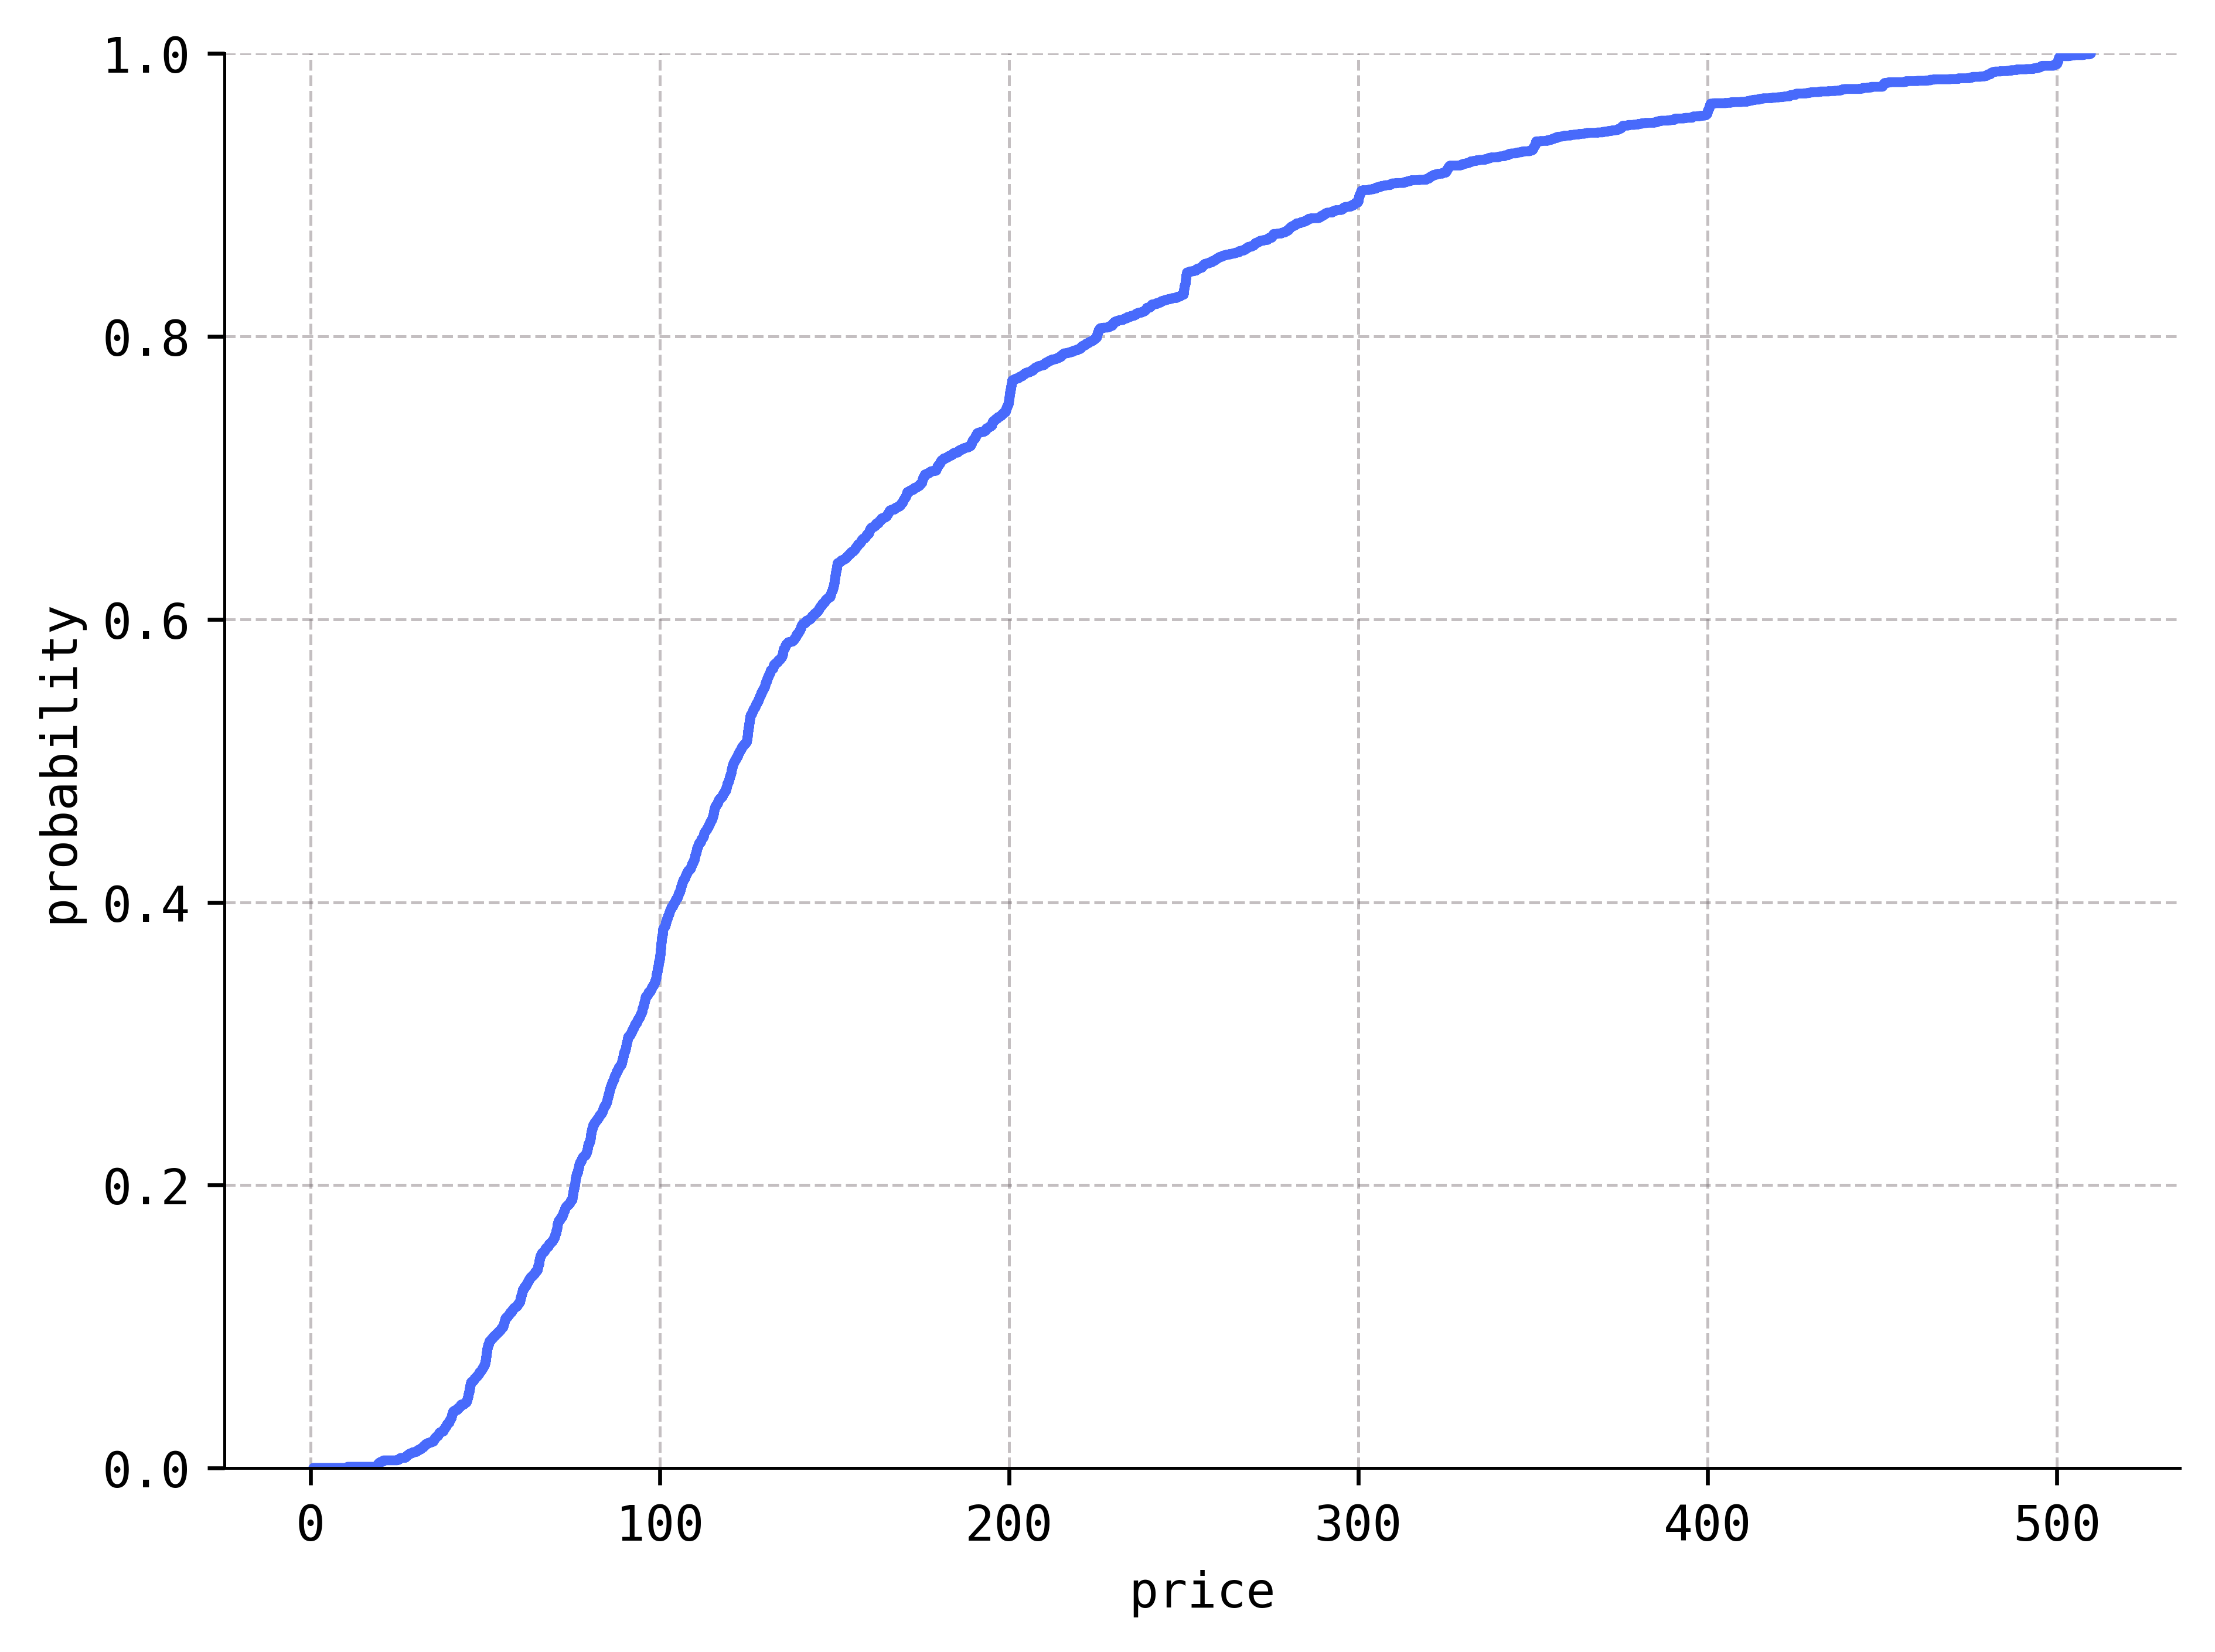

In [2]:
sns.ecdfplot(x=srs)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Remember, the CDFs of discrete distributions are step functions. So why doesn't _this_ look like a step function? Essentially, the data points are so numerous and packed together so tightly along the $x$-axis that we can't see the steps. But rest assured, if we were to zoom in, we'd see them.

```{margin}

Actually, it's not quite right to say that the empirical variance $s^2$ is the parameter estimate derived from the method of moments or maximum likelihood estimation. In fact, the latter estimates have the sample size $m$ in the denominator, whereas the empirical variance $s^2$ is usually defined with $m-1$ in the denominator.
```
Now, what if we thought that our Airbnb prices were well modeled by a normal distribution, so that

$$
X_1,X_2,\ldots,X_{3{,}972} ; \mu,\sigma^2 \sim \mathcal{N}(\mu,\sigma^2)
$$

in the notation introduced above. How might we find good settings for the parameters $\mu$ and $\sigma^2$? In this case, we might choose $\mu$ and $\sigma^2$ to be the _empirical mean_ $\bar{x}$ and _empirical variance_ $s^2$, which you learned about back in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments)---and which we will review in a section below. (This is the _method of moments_ for estimating model parameters which, in this special case, is also the method of _maximum likelihood estimation_.) Let's then plot the ECDF of the dataset with the CDF of the normal model distribution superimposed:

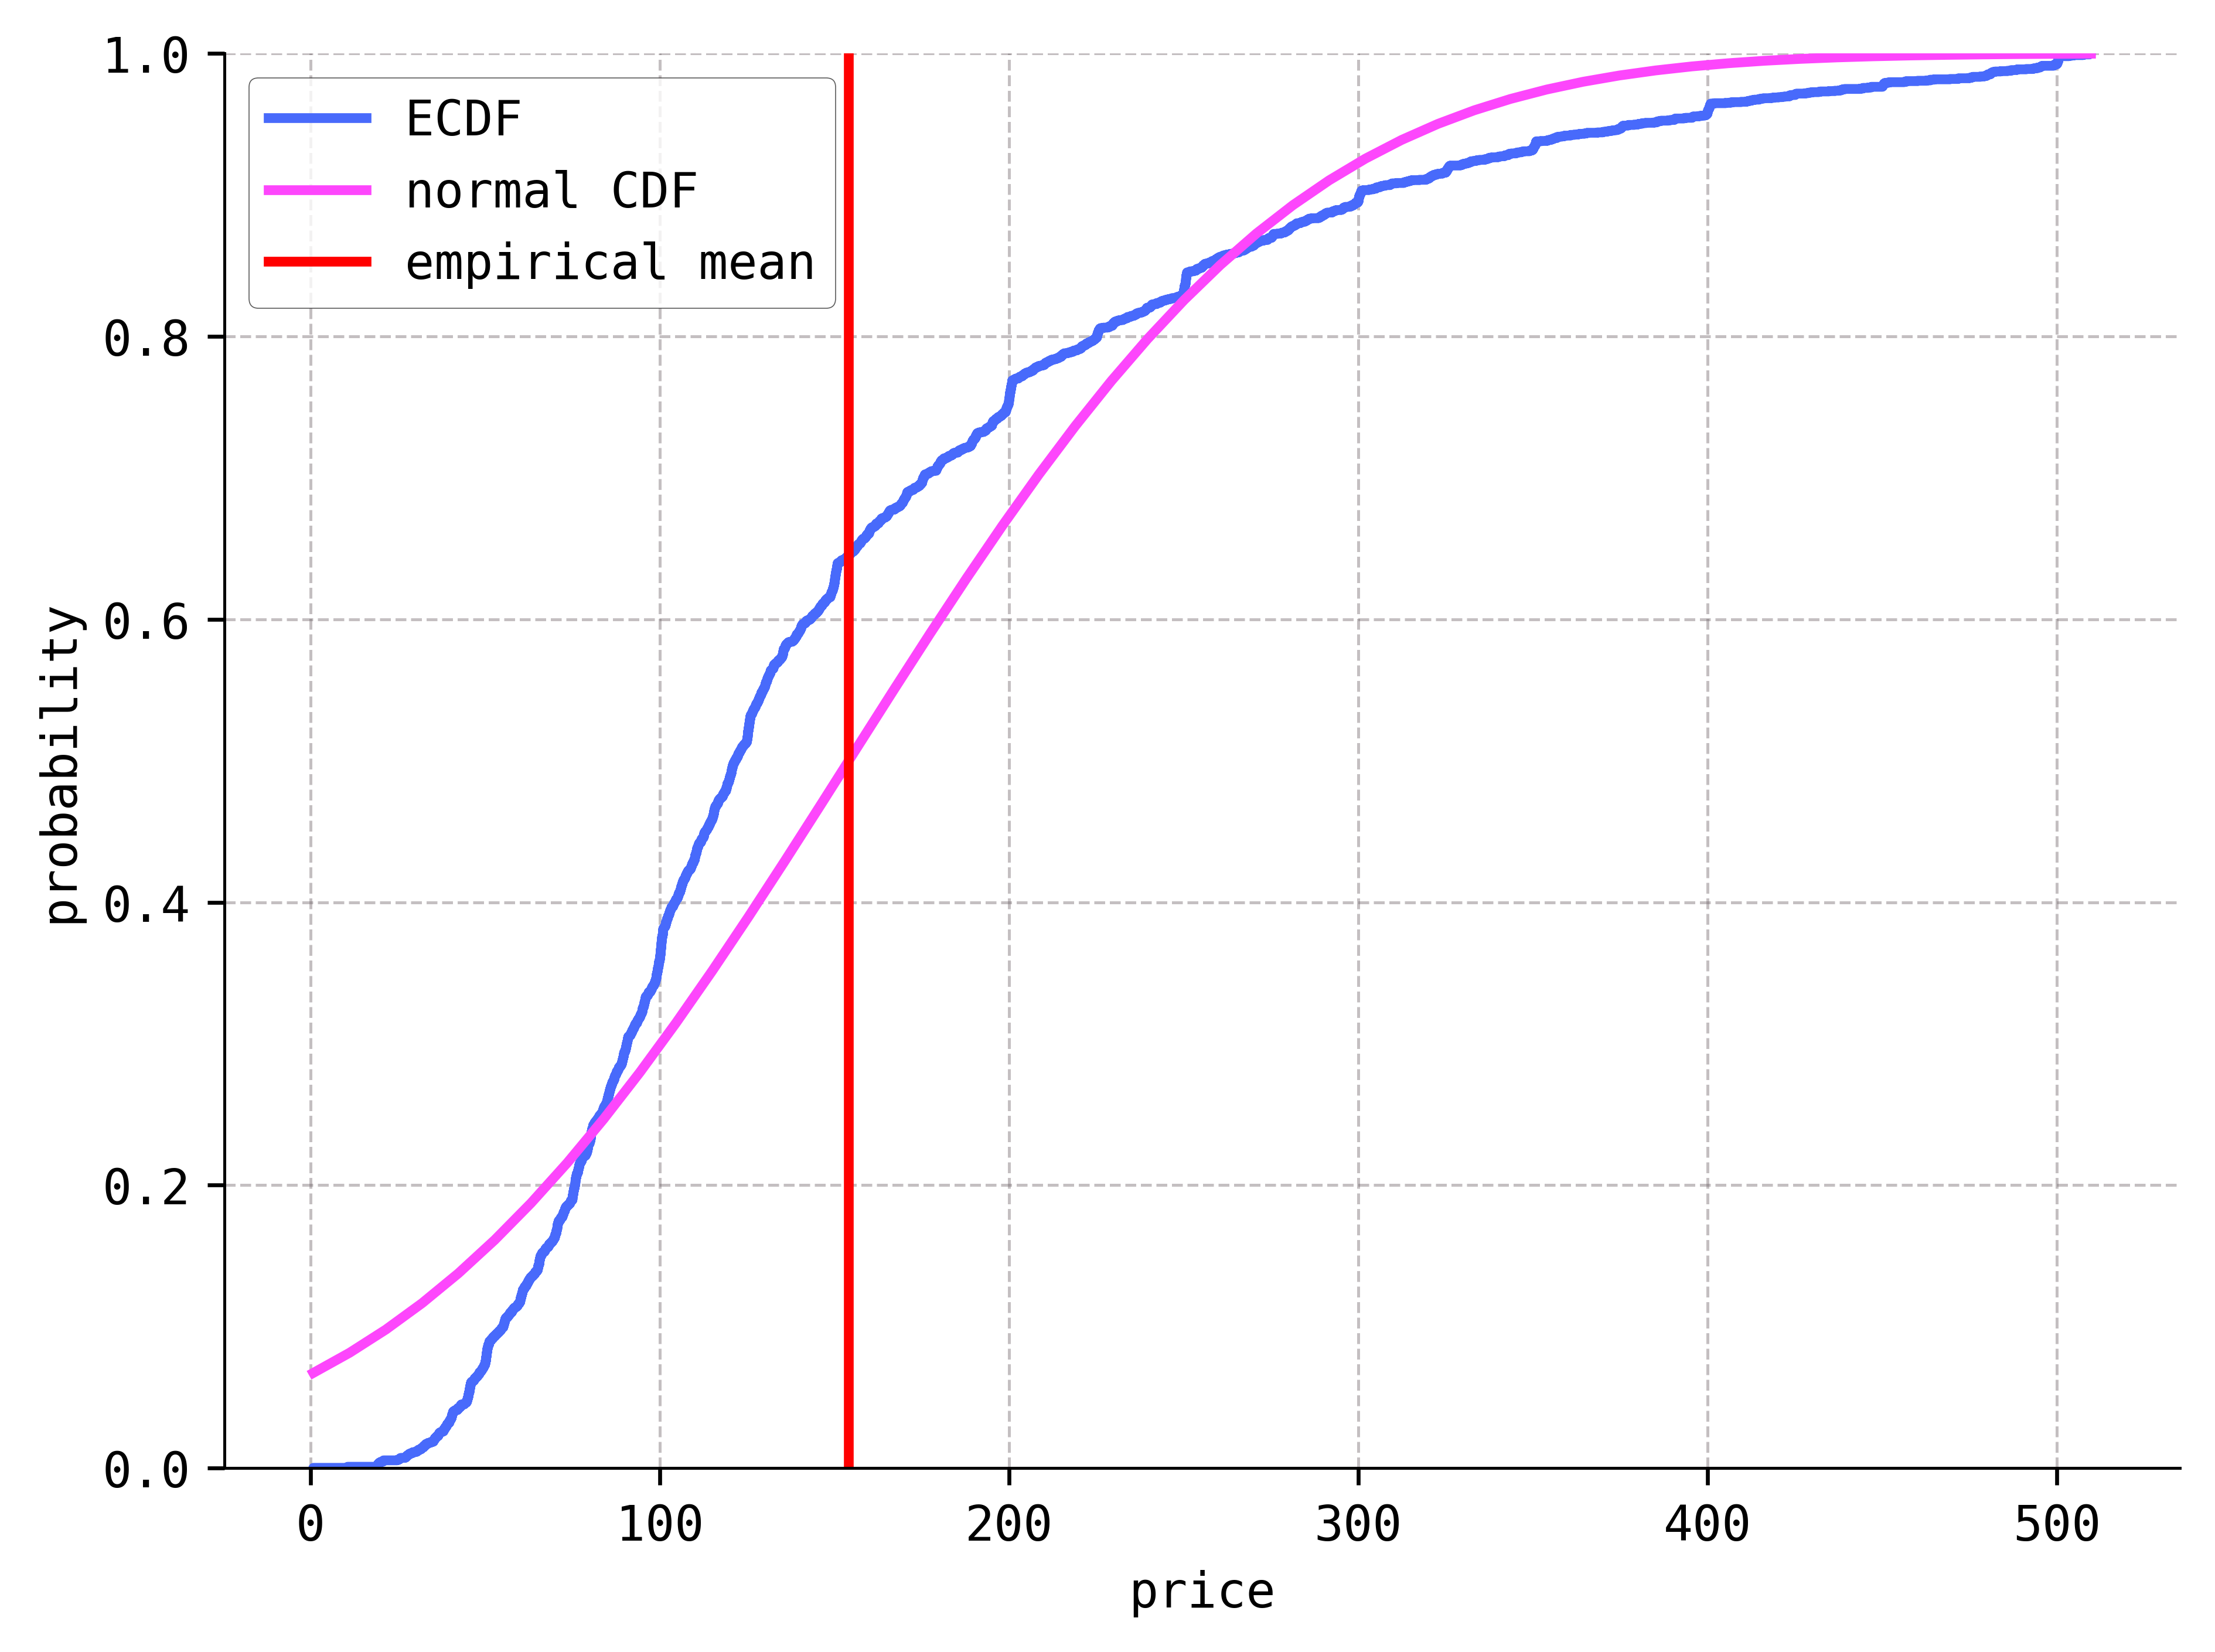

In [3]:
xbar = srs.mean()
s = srs.std()
X = sp.stats.norm(loc=xbar, scale=s)
grid = np.linspace(srs.min(), srs.max())

sns.ecdfplot(x=srs, label='ECDF')
plt.plot(grid, X.cdf(grid), label='normal CDF')
plt.axvline(x=xbar, color='r', label='empirical mean')
plt.xlabel('price')
plt.ylabel('probability')
plt.legend()
plt.tight_layout()

Yikes. Those CDFs are quite different from each other, suggesting that the normal model is a bad fit.

Closely related to CDFs are density functions, of course. Now, _if_ we assume that our Airbnb dataset is an observed random sample drawn from _some_ unknown "true" model distribution, then what might the density function of that model distribution look like? As I will show you in a section below, computers are capable of estimating these types of PDFs from data using something called _kernel density estimation_ (KDE). If I feed the Airbnb dataset into my computer, it returns the following sketch of the data density curve using KDE:

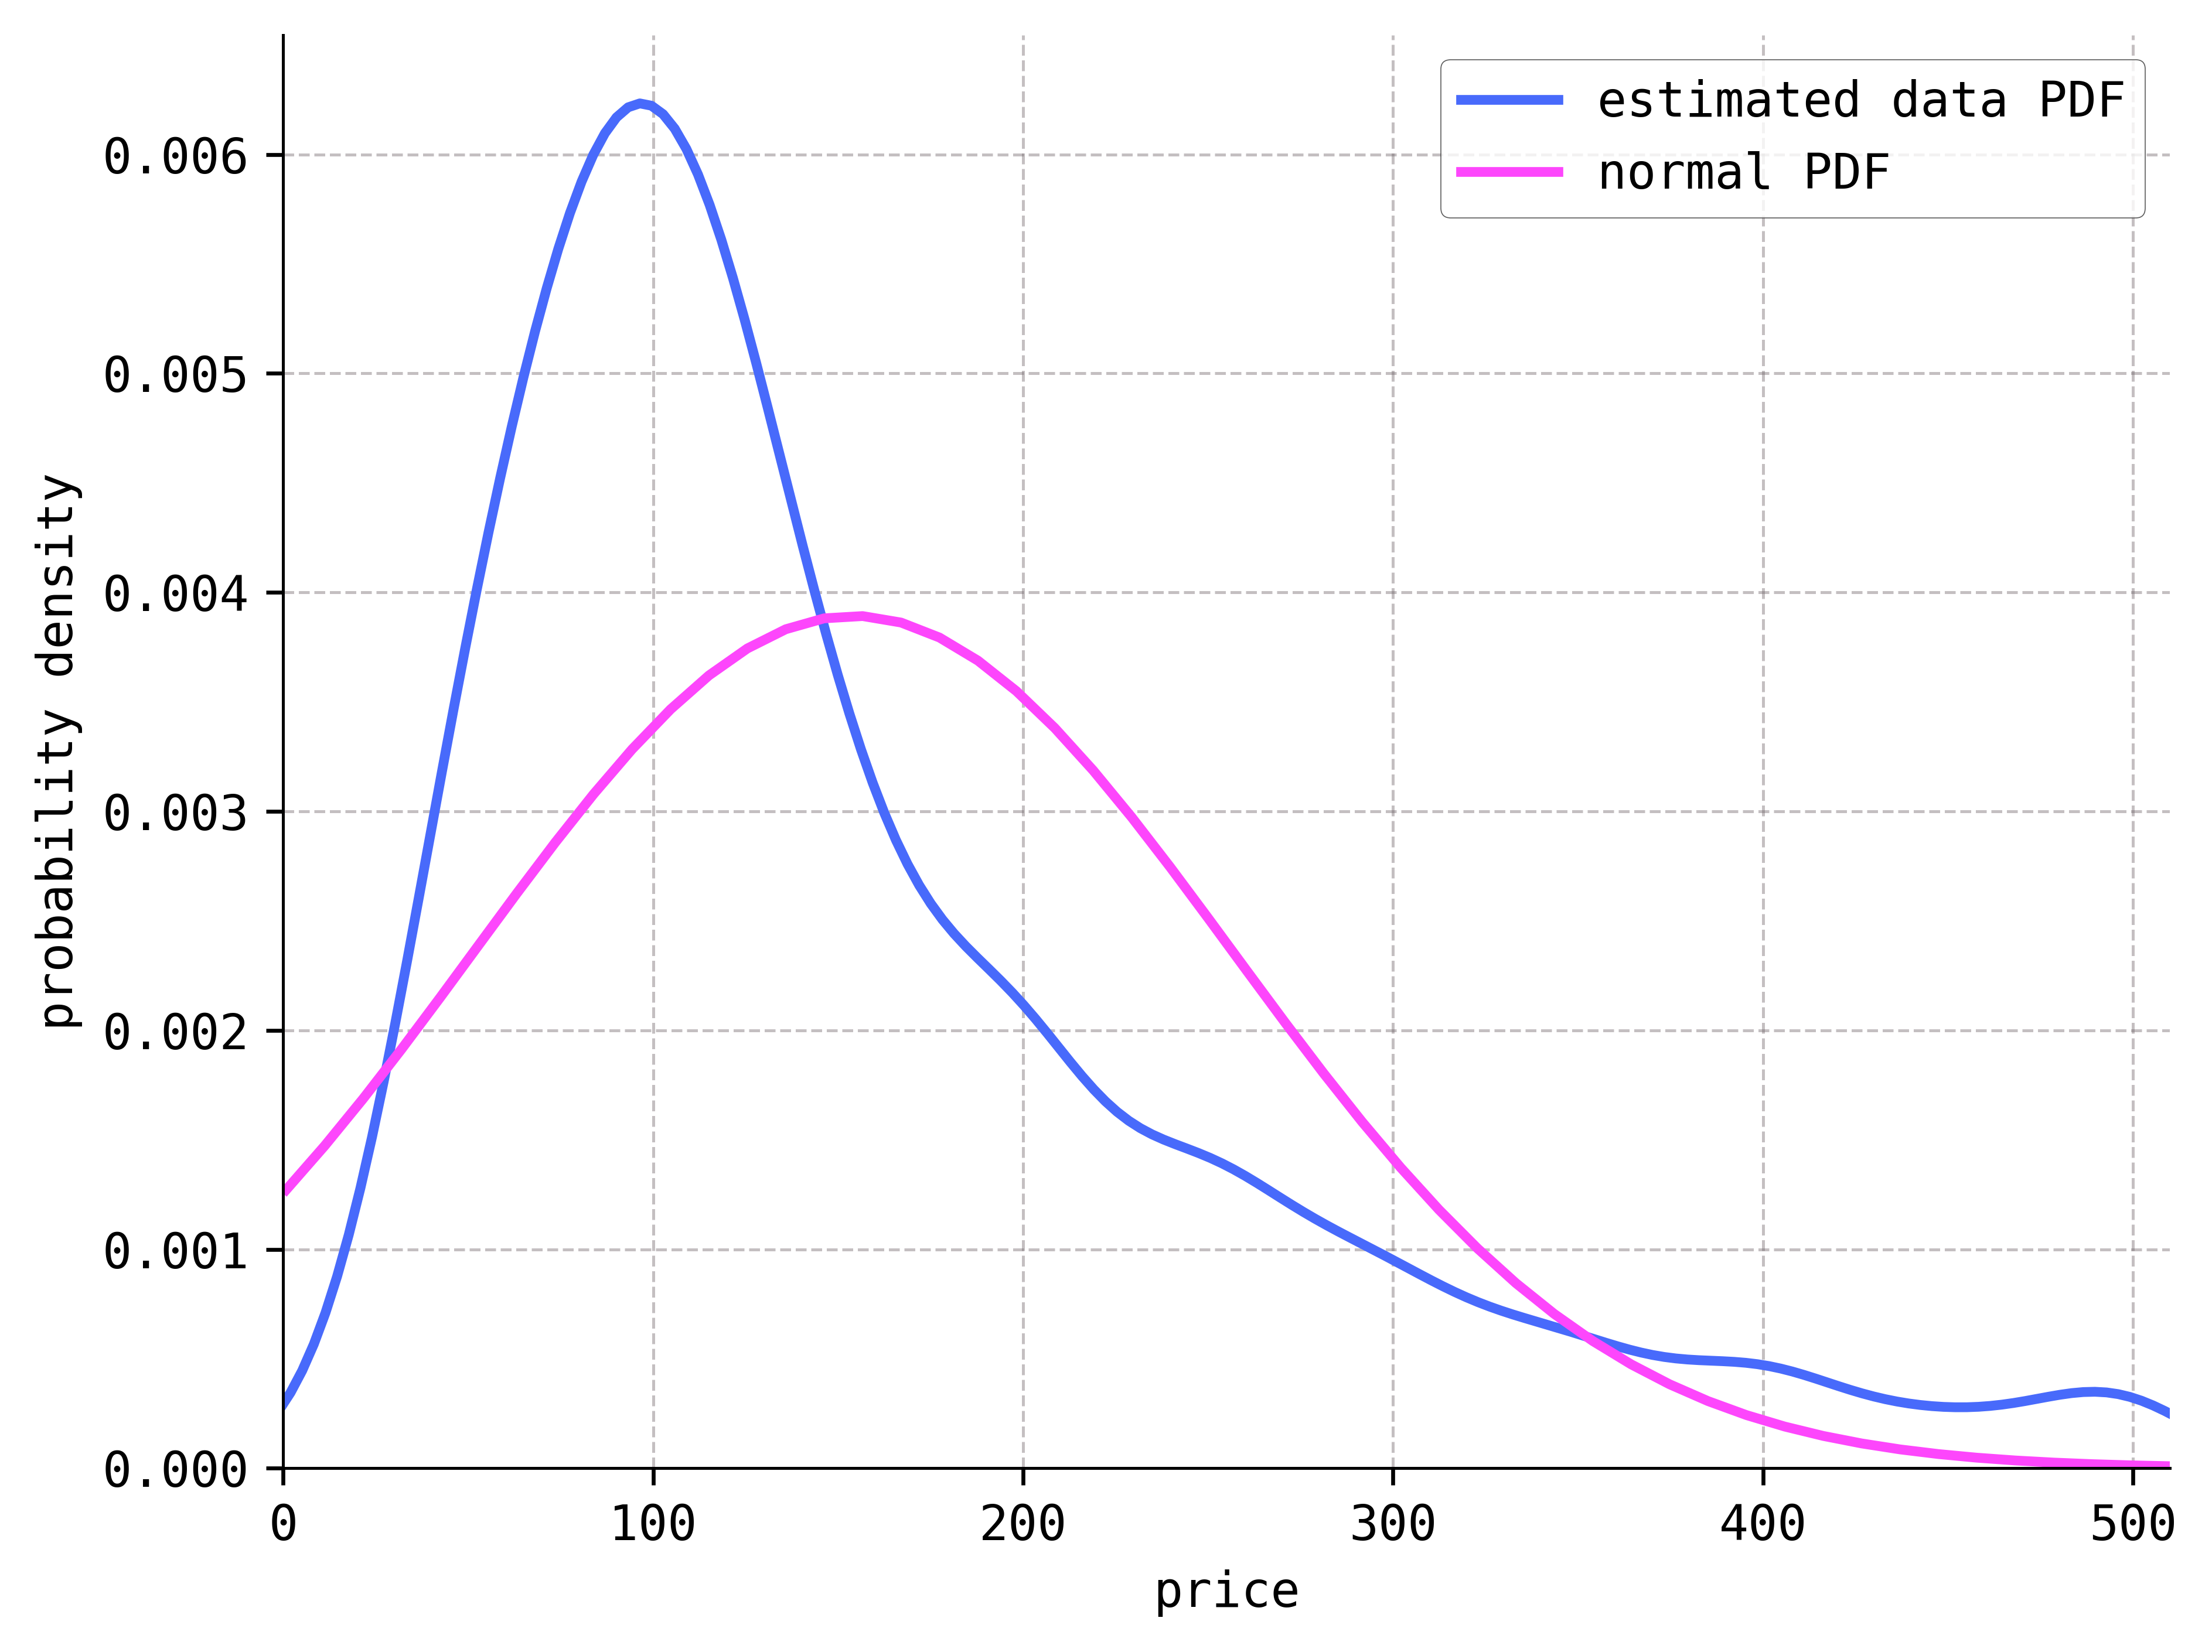

In [4]:
sns.kdeplot(x=srs, label='estimated data PDF')
plt.plot(grid, X.pdf(grid), label='normal PDF')
plt.xlabel('price')
plt.ylabel('probability density')
plt.xlim(0, 510)
plt.legend()
plt.tight_layout()

I have superimposed the density curve of the normal model from above for comparison. Again, this plot shows that this model is a bad fit.

However, the KDE estimate for the data density curve shows that the data is right-skewed (long tail to the right) and unimodal (one peak); this suggests that a log transform (which you learned about in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments)) might "un-skew" the data by removing the tail. Let's try performing a log transform, setting up a _new_ normal model based on the empirical mean and variance of the transformed dataset, and then print out CDFs and a KDE:

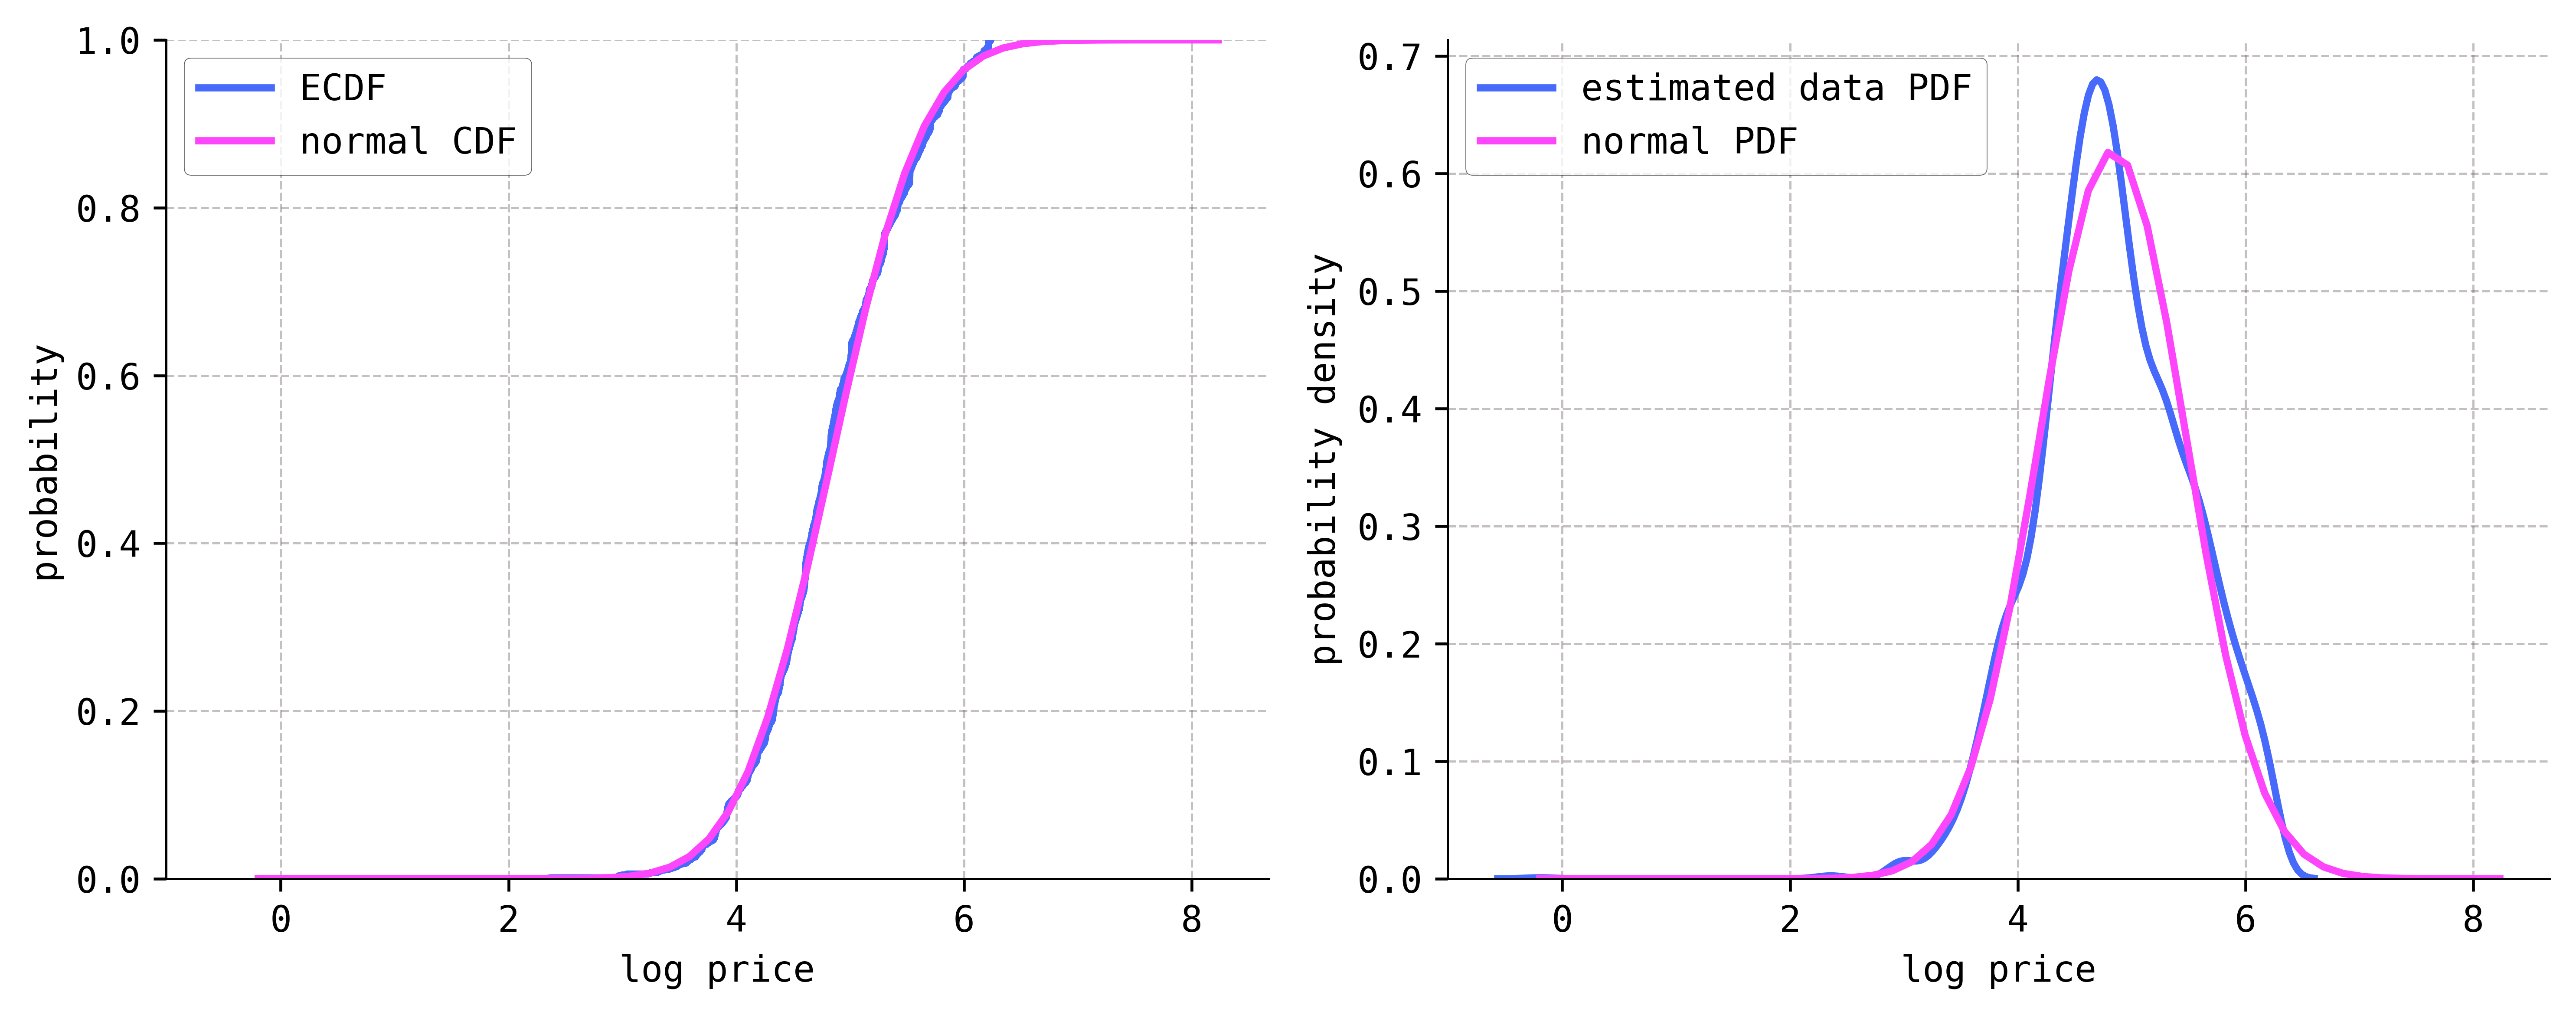

In [5]:
srs_log = np.log(srs)
X = sp.stats.norm(loc=srs_log.mean(), scale=srs_log.std())
grid = np.linspace(srs_log.min(), srs_log.max() + 2)

_, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), sharex=True)
sns.ecdfplot(x=srs_log, label='ECDF', ax=axes[0])
axes[0].plot(grid, X.cdf(grid), label='normal CDF')
axes[0].set_xlabel('log price')
axes[0].set_ylabel('probability')
axes[0].legend()
sns.kdeplot(x=srs_log, ax=axes[1], label='estimated data PDF')
axes[1].plot(grid, X.pdf(grid), label='normal PDF')
axes[1].set_xlabel('log price')
axes[1].set_ylabel('probability density')
axes[1].legend()
plt.tight_layout()

```{margin}

By the way, datasets whose log transforms are well modeled by normal distributions occur quite frequently. So frequently, in fact, that we refer to these datasets as [log-normally distributed](https://en.wikipedia.org/wiki/Log-normal_distribution#).
```
That looks pretty good! Based just on these two diagnostic plots, I would feel confident in using a normal model to model (the logarithm of the) data. We just need to remember that any information we learn about the data through this model, we need to "back-transform" using the exponential function to translate to the original dataset.


























## Histograms

In the previous section, we used a plot of the ECDF of the Airbnb prices in order to _visualize_ the empirical distribution. From this plot, we were able to get a sense of the _shape_ of the dataset.

There are a few more ways that we might attempt to visualize the empirical distribution. Indeed, since the empirical distribution of the Airbnb prices is technically discrete, we might attempt to visualize it using the probability histograms that we saw in {numref}`prob-histo` and implemented in the [thrid programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments). However, as we saw in the previous section, the data points in our sample are so numerous and packed so closely together that such a probability histogram would be essentially useless. We would have $3{,}548$ bars in our histogram, one for each unique price in our dataset!

But here's an idea: Suppose we "bin together" nearby prices along the $x$-axis _before_ we draw the histogram. In other words, imagine we chop up the $x$-axis into smaller subintervals called _bins_, and then group together nearby data points in these bins:

```{image} ../img/bins1.svg
:width: 100%
:align: center
```
&nbsp;

In the figure on the right, there are seven bins, labeled $B_1,B_2,\ldots,B_7$. The number of bins can either be chosen explicitly by us, or we can let the computer choose the "optimal" number of bins based on some rule of thumb. Either way, the number $k$ of bins need not be $7$.

Now, to draw the "binned" histogram, we put a rectangle on top of each bin:

```{image} ../img/bins.svg
:width: 70%
:align: center
```
&nbsp;

The heights of the rectangles must satisfy _two_ properties: (1) Their areas must sum to $1$, and (2) their heights must be proportional to the number of data points that fall within the bins. For example, you can see that the taller rectangles in the figure contain _more_ data points in their base bins. If $k$ is the total number of bins and $m$ is the size of the data set, then to satisfy both these properties, we can choose the $j$-th rectangle (for $j=1,2,\ldots,k$) to have height

\begin{equation*}
\frac{\text{number of data points in $j$-th bin}}{m \times (\text{width of $j$-th bin})}.
\end{equation*}

Of course, computers are capable of plotting these types of histograms. Here is one for our Airbnb prices:

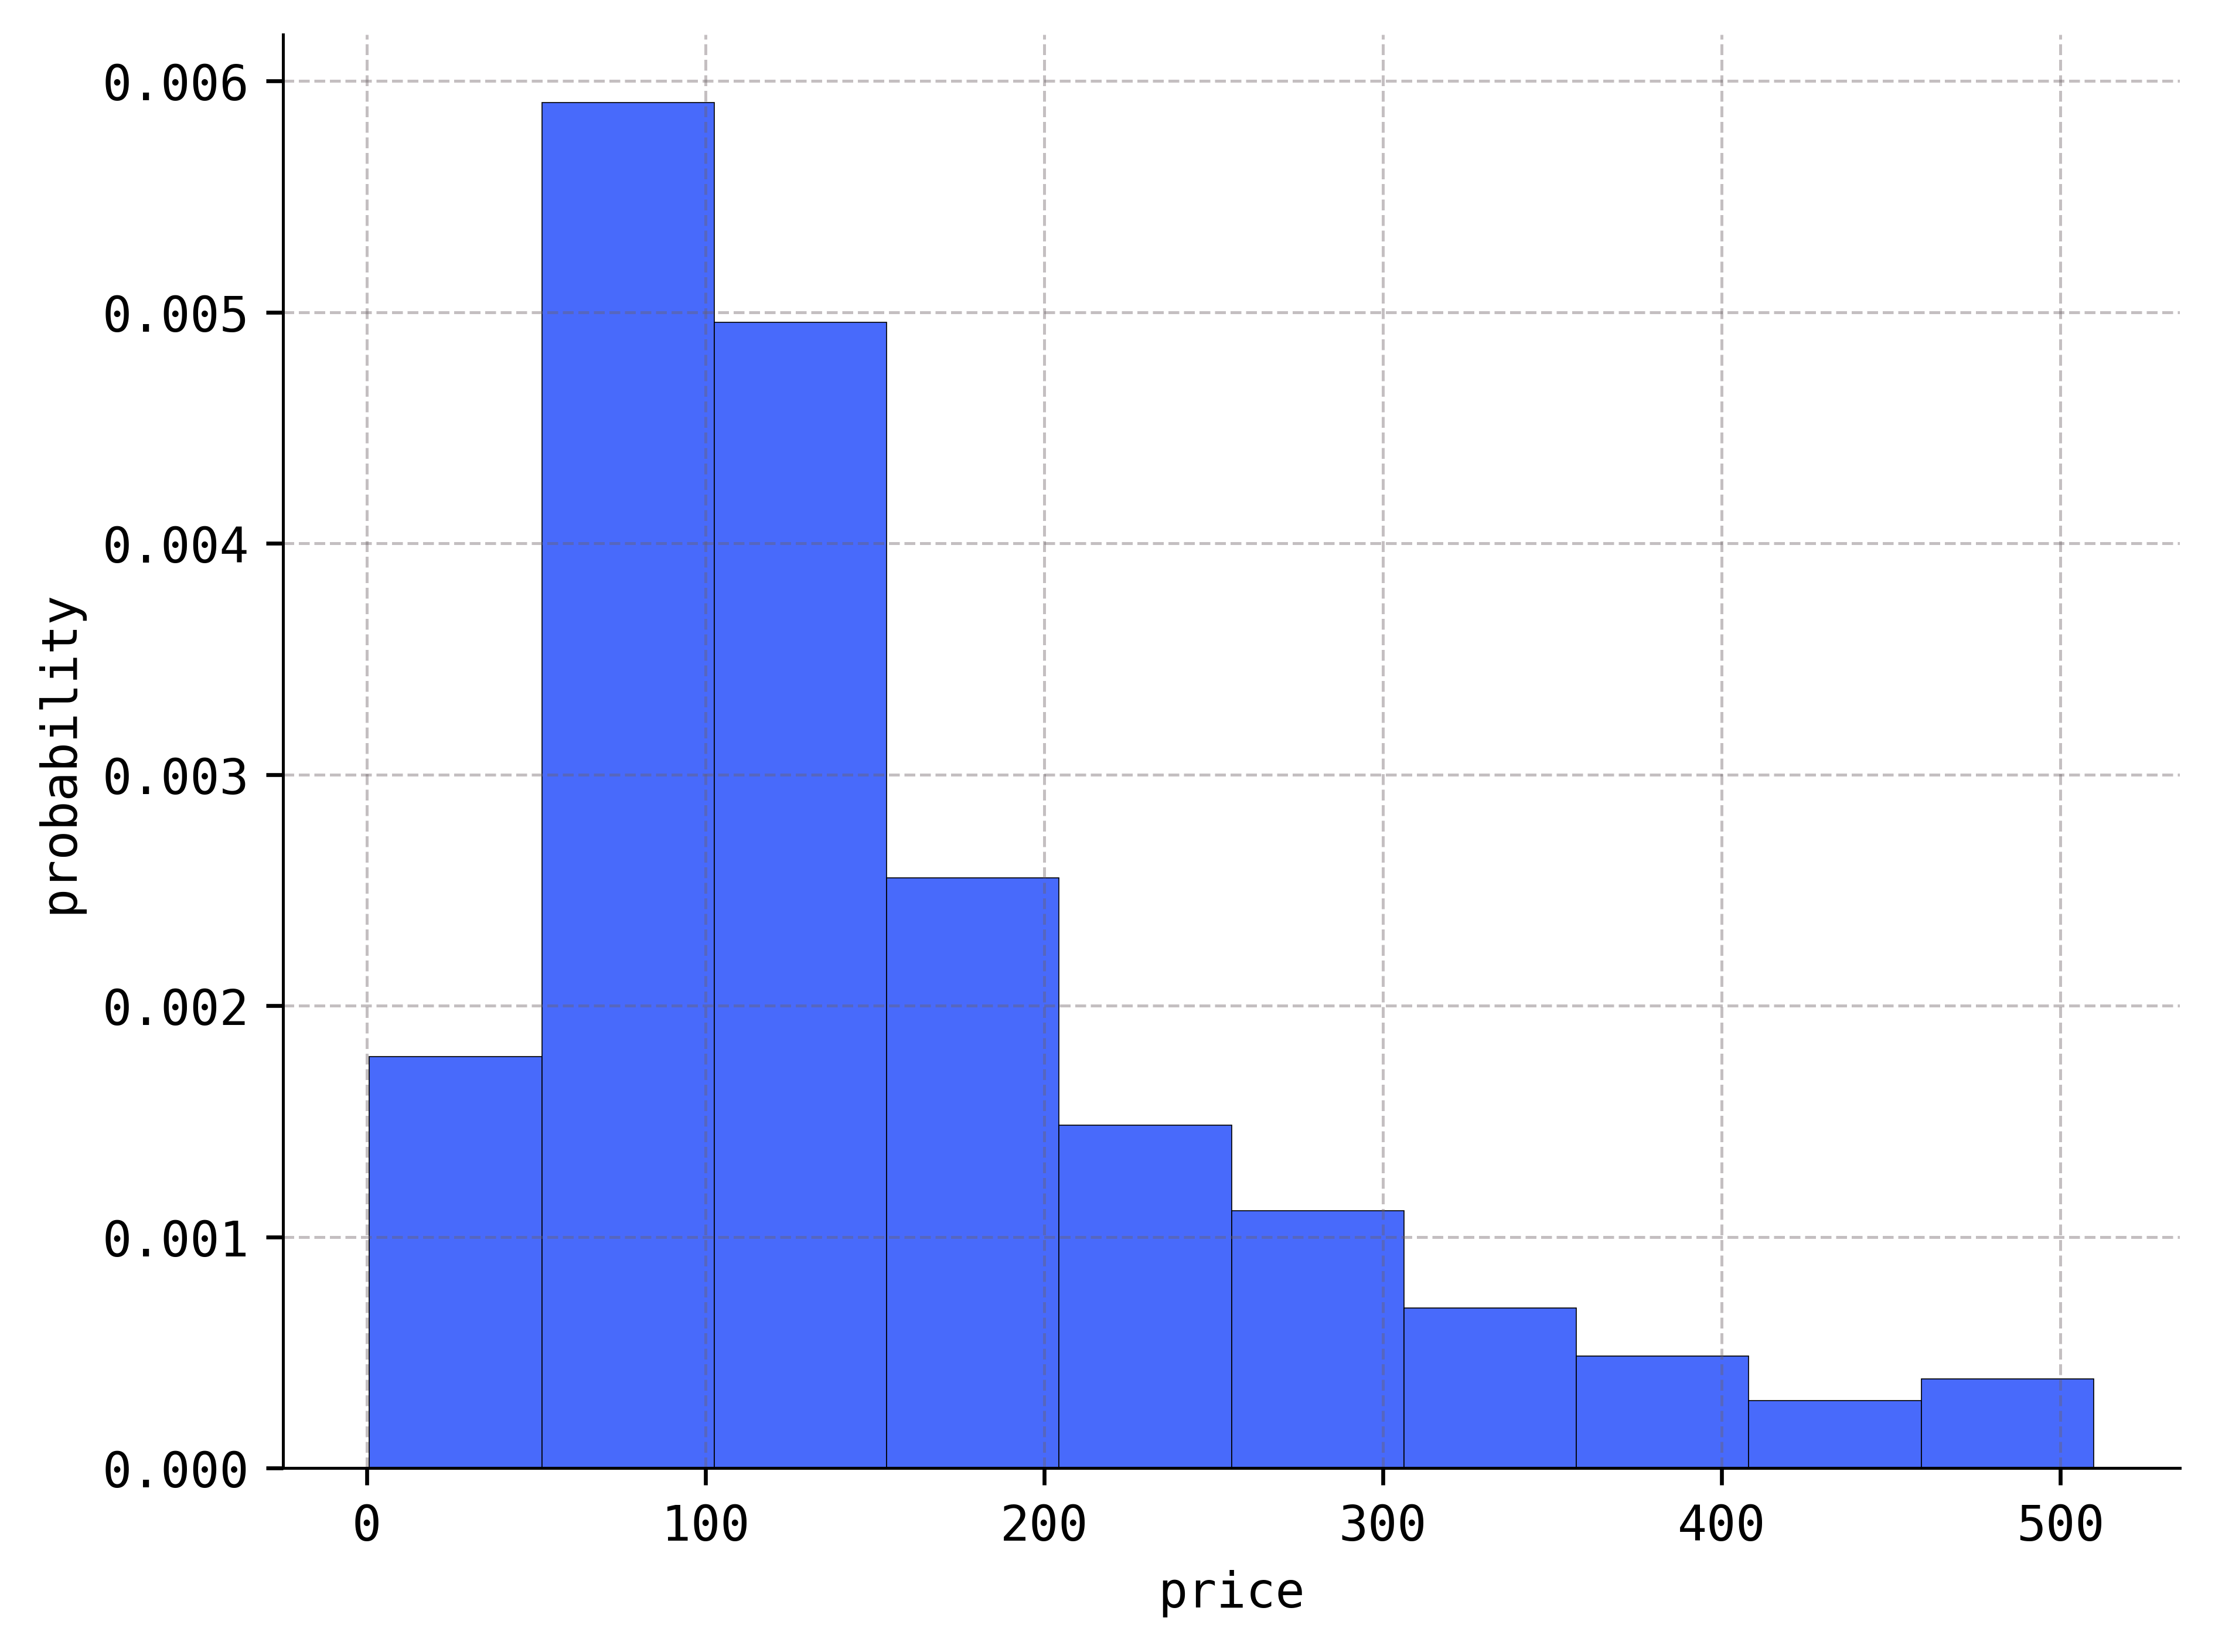

In [6]:
srs.plot(kind='hist', ec='black', density=True)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Taking a moment to look at this histogram, if you then scroll up and look at the estimated data density curve in the previous section, you'll notice that they match up pretty well. Thus, both ways of getting a sense of the shape of the data (estimated density curves and histograms) do their jobs adequately.

Be warned, however, that the shapes of these types of histograms are quite sensitive to the number of bins (hence also the bin width), and making the _wrong_ choice for this number can sometimes hide important features of the data. Here's a histogram of the Airbnb data with 100 bins:

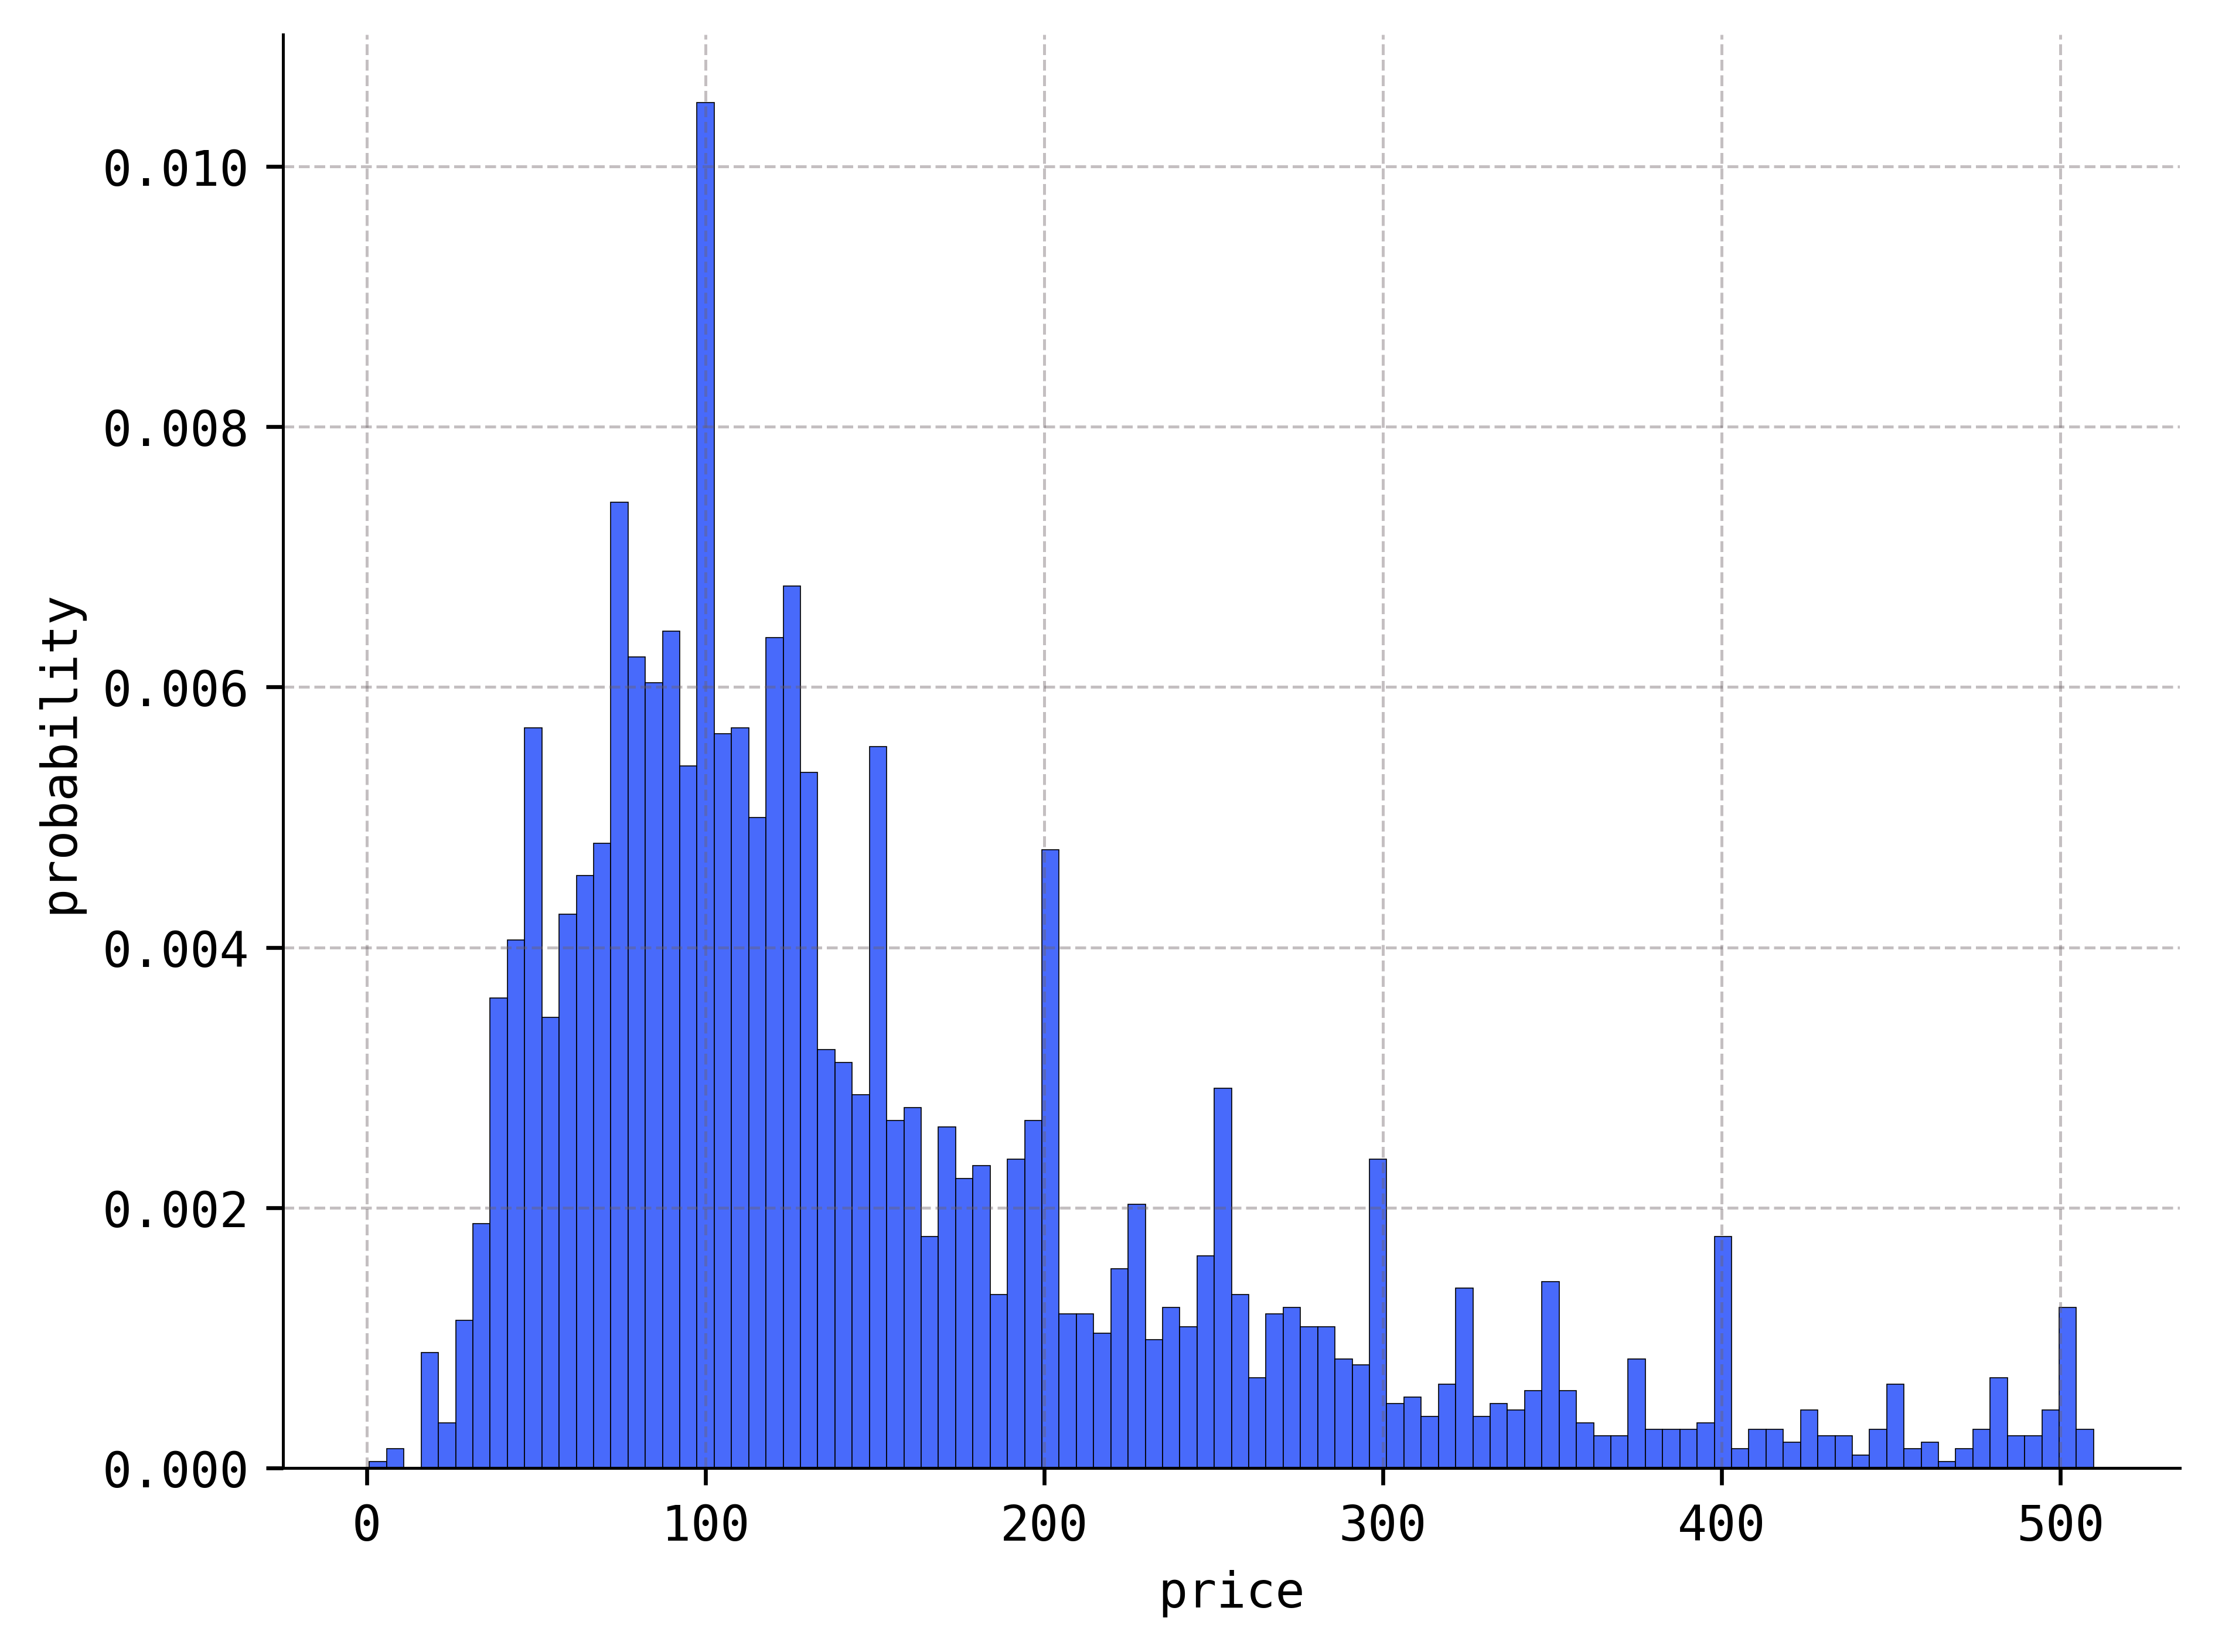

In [7]:
srs.plot(kind='hist', ec='black', density=True, bins=100)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Though there are lots more bins here than our first histogram, I can still get a pretty good sense of the shape of the data. When you increase the number of bins, you tend to lose "smoothness" of the histogram.

At the other extreme, here's a histogram with three bins:

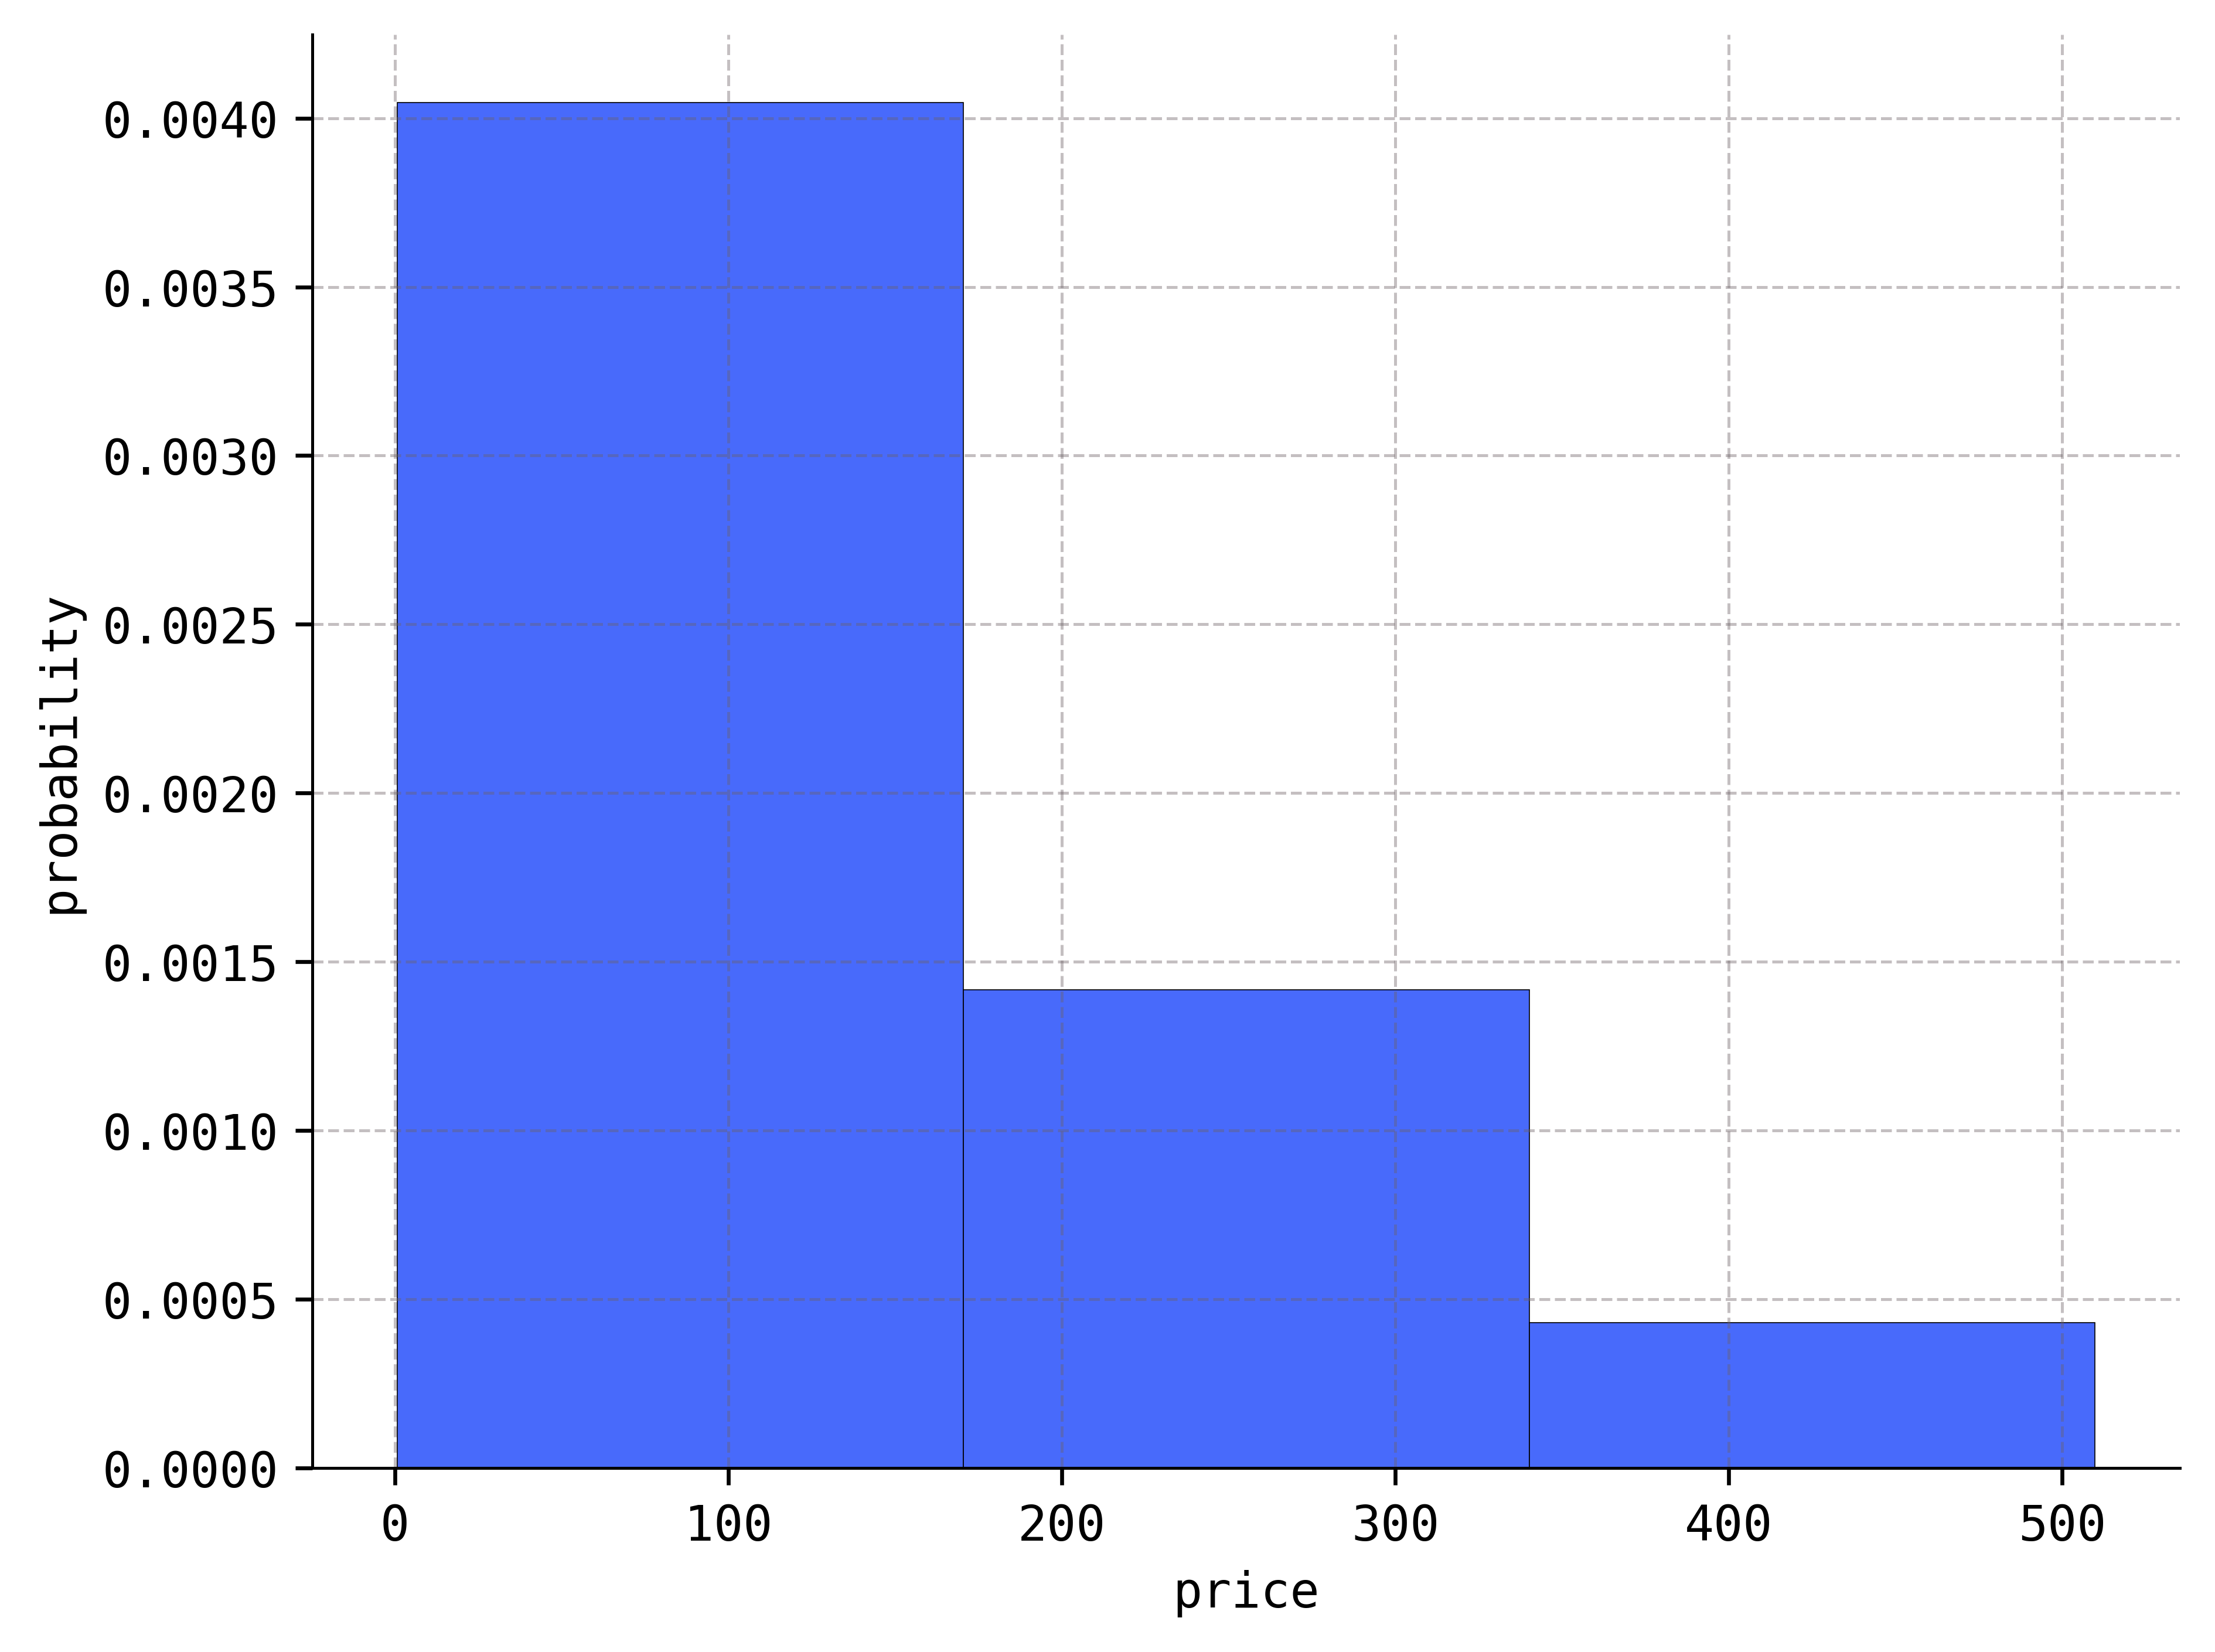

In [8]:
srs.plot(kind='hist', ec='black', density=True, bins=3)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

This last histogram is not particularly informative. I get a sense that the sample data is skewed toward the right, but that's about it.

So, how do you choose the number of bins? First, you might let the computer decide for you, using the default setting. This default setting is often based off of rules of thumb that have been demonstrated to work well for some reason or another. Then, you can play with the number of bins manually, fine-tuning the number until you get a figure that you believe most accurately represents the shape of the data.























## Kernel density estimation

Let's return now to an idea that we met above: Estimating a empirical distribution's _density_ curve. I mentioned that one way to accomplish this task is to use something called a _kernel density estimator_ (KDE). I will now give a very brief introduction to these estimators.

Naturally, a kernel density estimation begins by choosing the _kernel_, which is a function that has a "bell shape," not unlike the normal density curve. In fact, one can even _choose_ the normal density curve as the kernel, and then one obtains _Gaussian KDE_. These will be the only types of kernels that we will consider.

Imagine for simplicity that we have three data points along the $x$-axis. The idea is then to place three kernels (i.e., normal density curves) directly over top of the data points. We then _sum_ the kernels and divide by $3$ (to normalize the area under the curve to $1$), obtaining a _kernel density estimate_. The width of the kernel is controlled by a parameter called _bandwidth_, denoted $h$, which coincides with the standard deviation of the normal distribution in the case of Gaussian KDE. So, large values of $h$ correspond to wide kernels, and smaller values correspond to narrow kernels. Here are three examples of Gaussian KDE with different values of $h$:

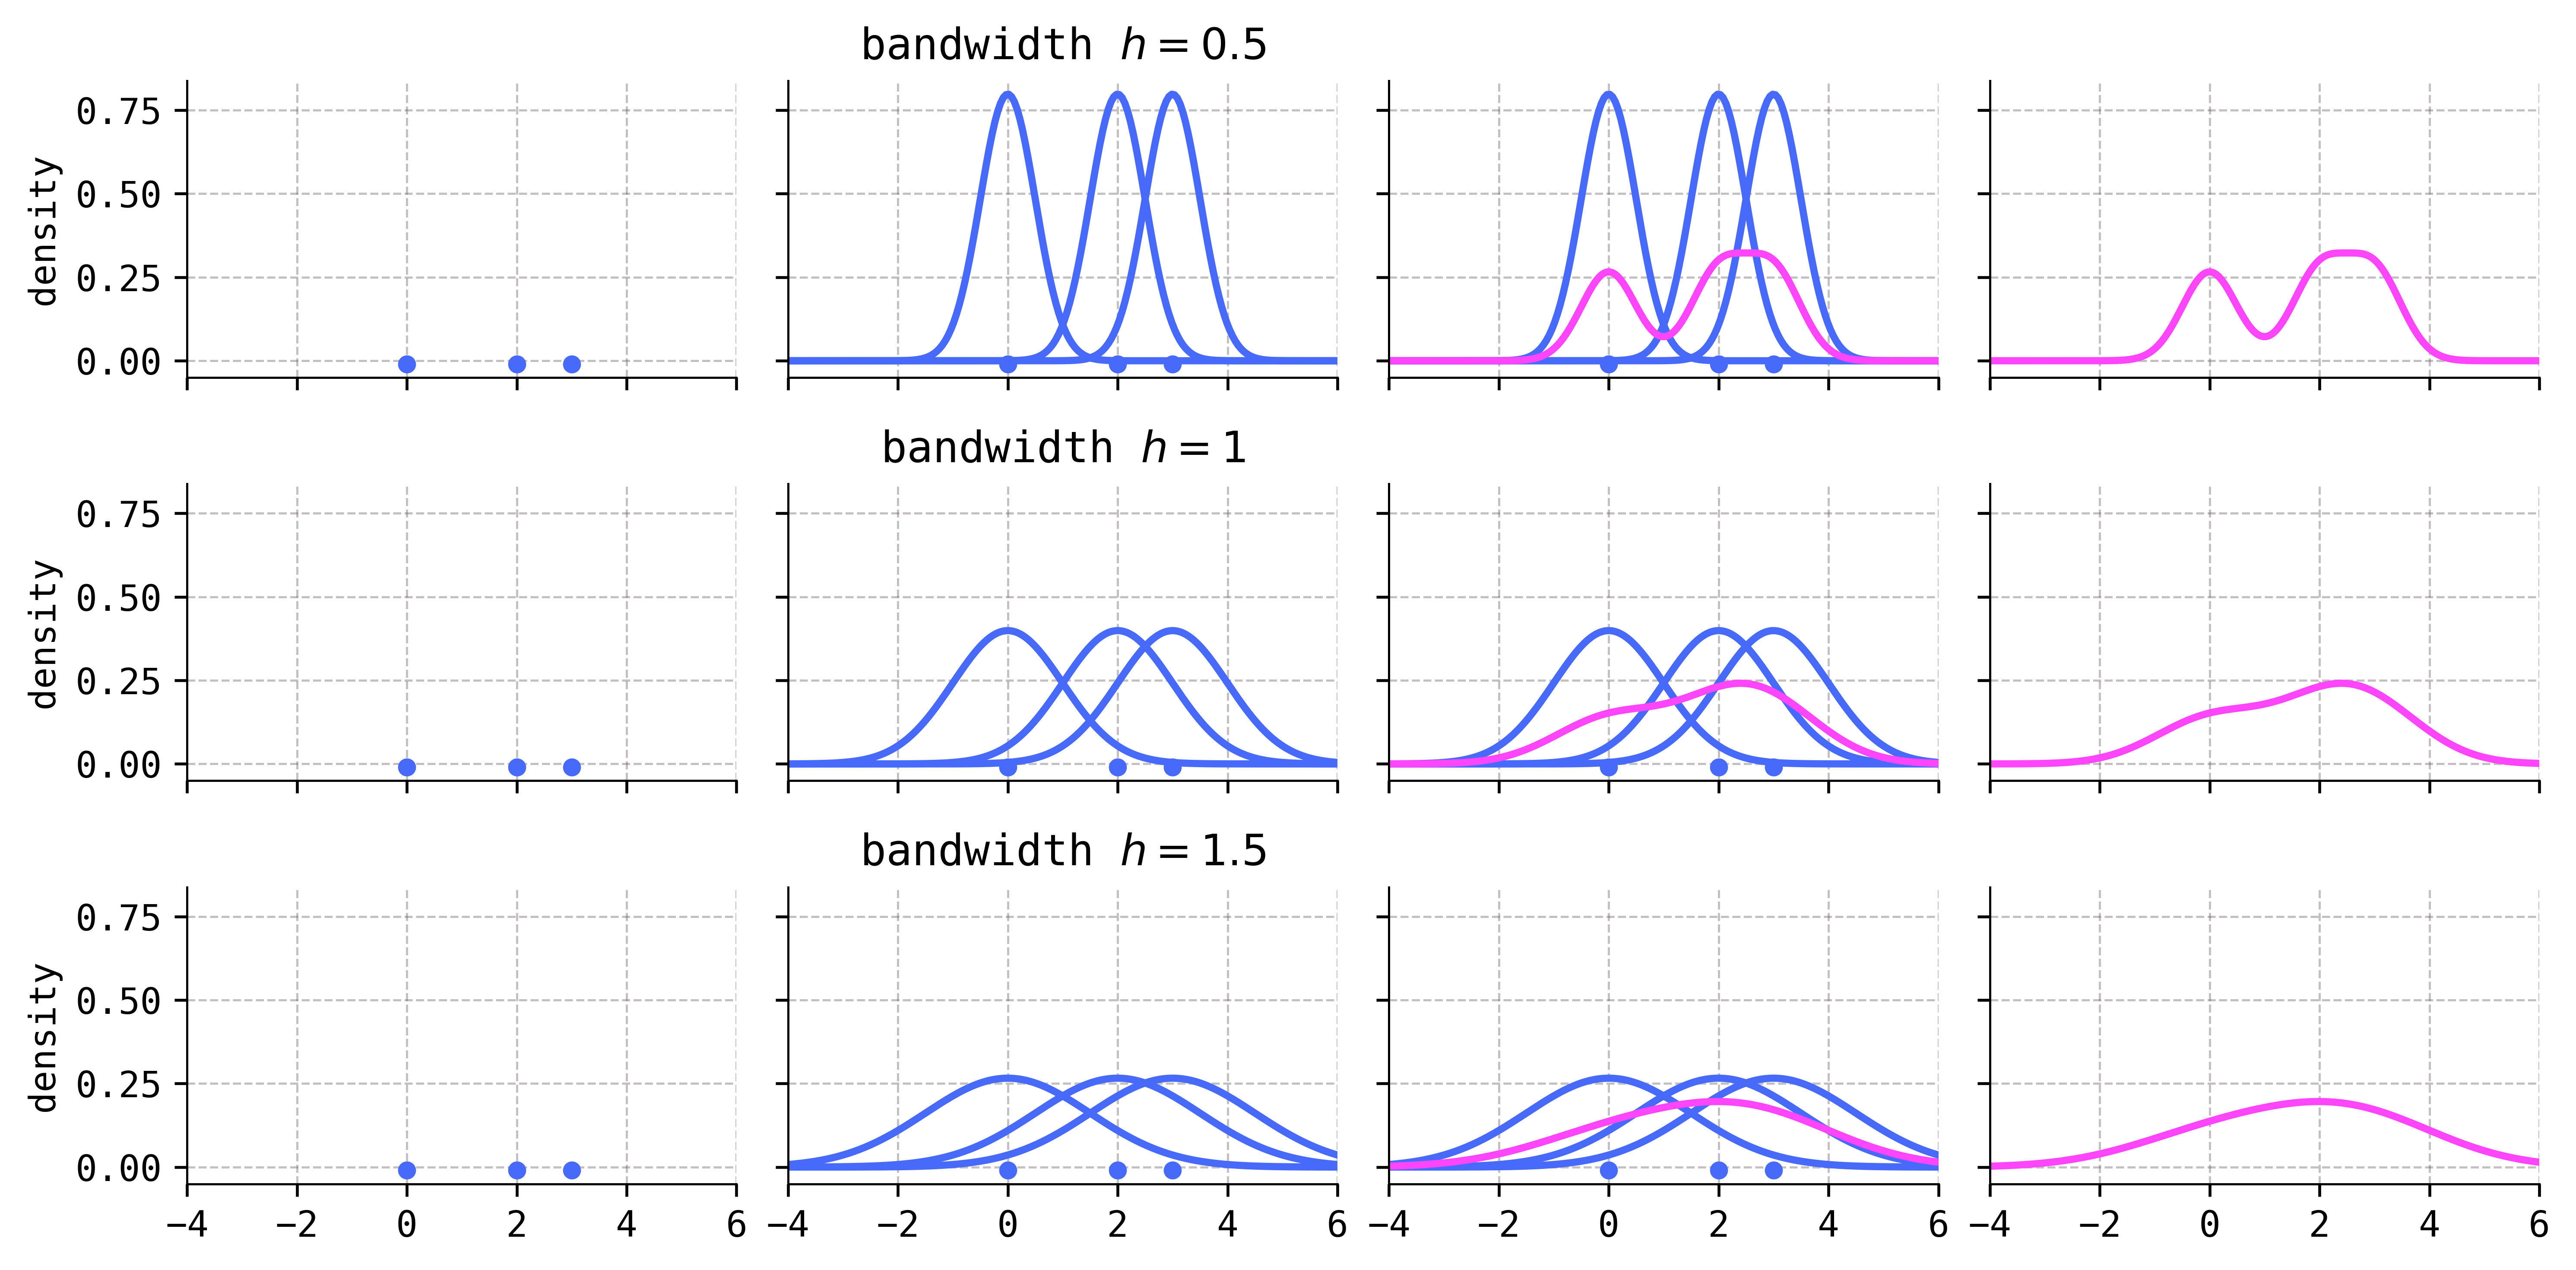

In [9]:
x = np.linspace(-4, 6, 200)
fig, axes = plt.subplots(nrows=3, ncols=4, sharey=True, sharex=True, figsize=(10, 5))
bandwidths = [0.5, 1, 1.5]

for h in bandwidths:
    idx = bandwidths.index(h)
    blue = '#486AFB'
    magenta = '#FD46FC'

    y1 = sp.stats.norm.pdf(x / h) / h
    y2 = sp.stats.norm.pdf((x - 2) / h) / h
    y3 = sp.stats.norm.pdf((x - 3) / h) / h

    axes[idx, 0].plot(0, -0.01, 'o', color=blue)
    axes[idx, 0].plot(2, -0.01, 'o', color=blue)
    axes[idx, 0].plot(3, -0.01, 'o', color=blue)
    axes[idx, 0].set_xlim(-4, 6)
    axes[idx, 0].set_ylabel('density')

    axes[idx, 1].plot(x, y1, )
    axes[idx, 1].plot(x, y2, color=blue)
    axes[idx, 1].plot(x, y3, color=blue)
    axes[idx, 1].plot(0, -0.01, 'o', color=blue)
    axes[idx, 1].plot(2, -0.01, 'o', color=blue)
    axes[idx, 1].plot(3, -0.01, 'o', color=blue)
    axes[idx, 1].set_title(rf'bandwidth $h={h}$')

    axes[idx, 2].plot(x, y1, )
    axes[idx, 2].plot(x, y2, color=blue)
    axes[idx, 2].plot(x, y3, color=blue)
    axes[idx, 2].plot(0, -0.01, 'o', color=blue)
    axes[idx, 2].plot(2, -0.01, 'o', color=blue)
    axes[idx, 2].plot(3, -0.01, 'o', color=blue)
    axes[idx, 2].plot(x, (y1 + y2 + y3) / 3, label='sum of kernels')

    axes[idx, 3].plot(x, (y1 + y2 + y3) / 3, label='sum of kernels', color=magenta)

plt.tight_layout()

Reading from left to right, here's what's going on:

* The plots in the first column display the original three data points.

* In the second column, you see the normal density curves over top of the data points for three different values of the bandwidth $h$.

* In the third column, I have plotted the _sum_ of the three normal density curves (divided by $3$), which are, by definition, the KDEs generated from the data set.

* In the last column, I have plotted the KDEs on their own.

Now, cover up the middle two columns in the figure. Which of the KDEs do you believe does the best job of conveying the _shape_ of the data? I would say it's a split decision between $h=1$ and $h=0.5$.

You've seen how to generate a KDE for a small three-sample dataset. The KDE that I generated above for the Airbnb prices follows the exactly same procedure, but instead of three normal density curves, there are now 3,972 of them, one for each data point in the sample! Here are three KDEs for the Airbnb prices, with different bandwidths:

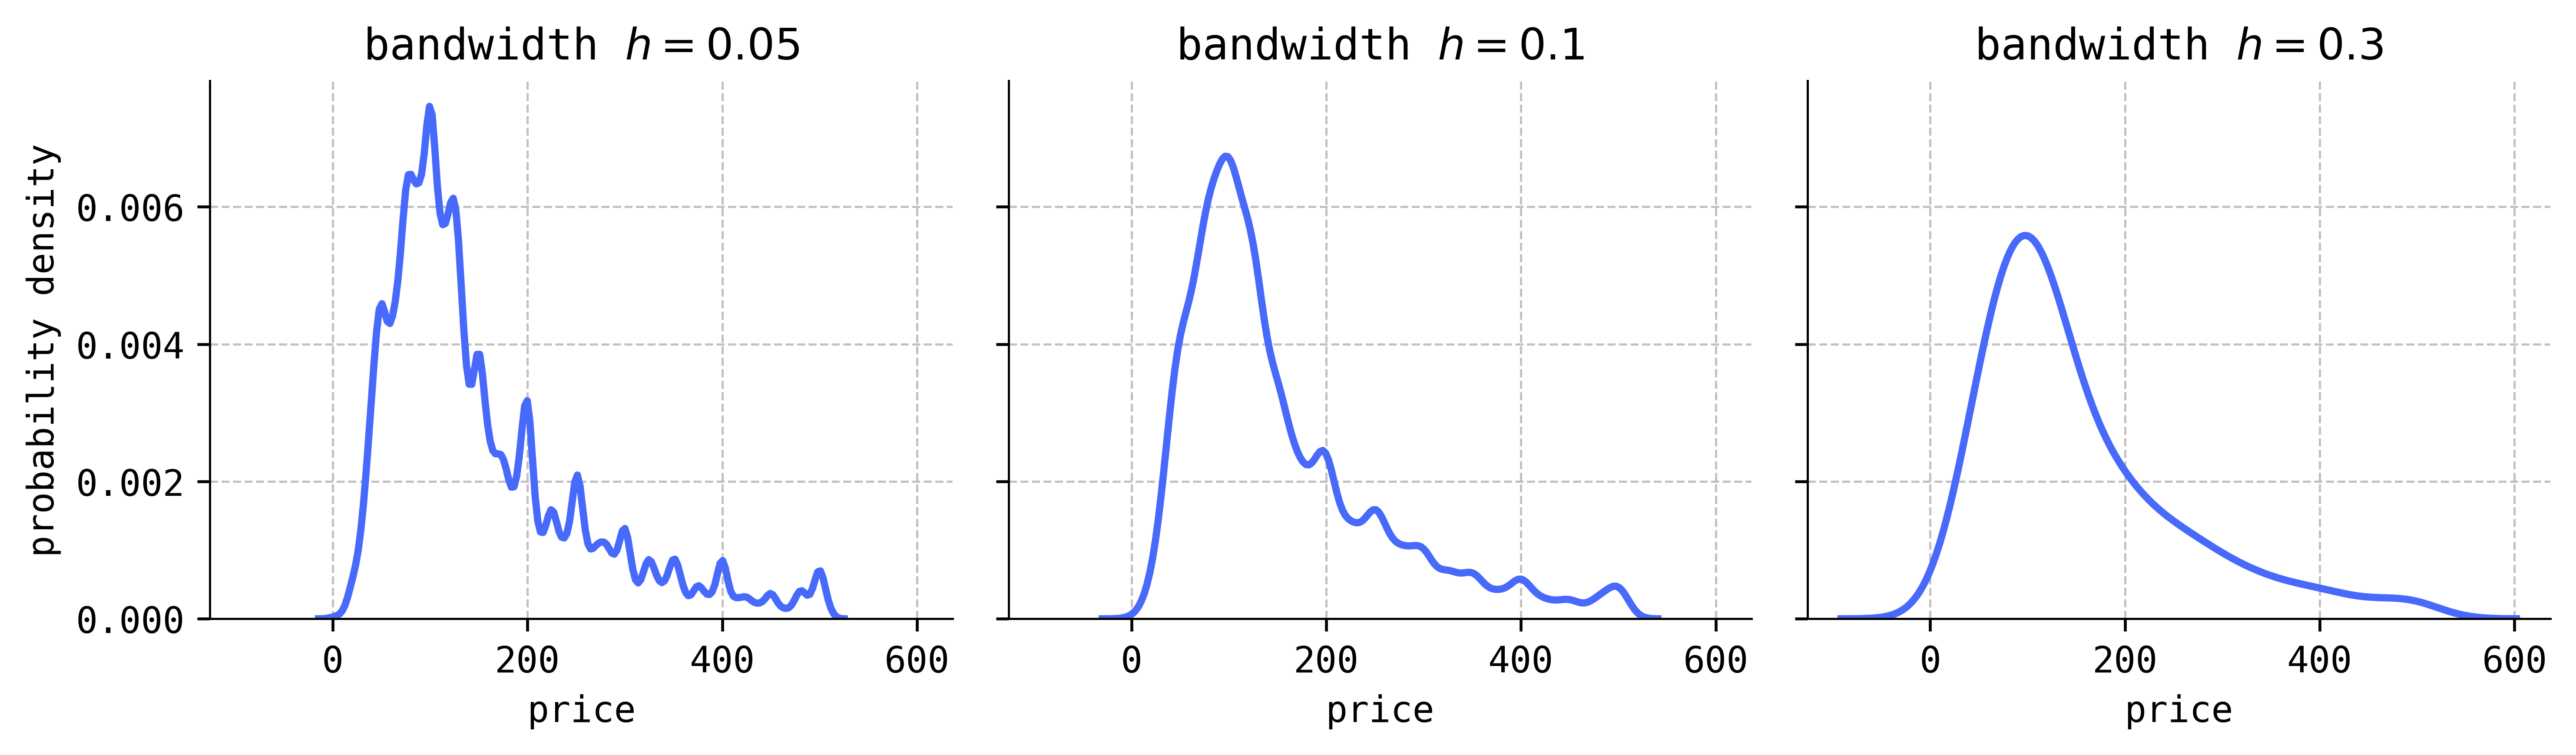

In [10]:
bandwidths = [0.05, 0.1, 0.3]
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(10, 3))

for h in bandwidths:
    idx = bandwidths.index(h)
    sns.kdeplot(x=srs, ax=axes[idx], bw_method=h)
    axes[idx].set_xlabel('price')
    axes[idx].set_title(f'bandwidth $h={h}$')
    
axes[0].set_ylabel('probability density')
plt.tight_layout()

So, we've seen that KDEs are supposed to serve as estimates for the density curves of datasets, but they are highly sensitive to the choice of bandwidth $h$. How do you choose $h$? Just like the 'number of bins' parameter for histograms, you are best off first letting the computer decide the bandwidth for you, and then manually fine-tune it (if needed) until you get a KDE that you believe best represents the data.



















## Empirical statistics

Before we continue discussing more ways to _visualize_ datasets, we need to discuss numerical summaries of datasets. This section is essentially a recapitulation of what you learned in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) with a few new things thrown in at the end.

Let's begin our discussion by returning to a general IID random sample

\begin{equation*}
X_1,X_2,\ldots,X_m \sim F,
\end{equation*}

where $F$ represents the (unknown) distribution function corresponding to a probabilistic model. Suppose that the model distribution has a mean $\mu$ and a variance $\sigma^2$, so that

\begin{equation*}
E(X_i) = \mu \quad \text{and} \quad V(X_i) = \sigma^2,
\end{equation*}

for each $i=1,2,\ldots,n$. Based on an observed random sample

\begin{equation*}
x_1,x_2,\ldots,x_m,
\end{equation*}

how might we estimate the unknown model parameters $\mu$ and $\sigma$?

```{prf:definition}
Let $x_1,x_2,\ldots,x_m$ be an observed random sample (i.e., a dataset). The *empirical mean* is defined to be the number

\begin{equation*}
\bar{x} = \frac{1}{m} \sum_{i=1}^m x_i,
\end{equation*}

while the *empirical variance* is defined to be the number

\begin{equation*}
s^2 = \frac{1}{m-1} \sum_{i=1}^m (x_i - \bar{x})^2.
\end{equation*}

The *empirical standard deviation* $s$ is defined, as usual, as the positive square root of the empirical variance, $s = \sqrt{s^2}$.
```

The empirical mean $\bar{x}$ and standard deviation $s$ are supposed to serve as data-based estimates for the model mean $\mu$ and standard deviation $\sigma$.

I should mention that the empirical quantities we just defined are often called the _sample mean_, _sample variance_, and _sample standard deviation_. However, as we will see later, our empirical quantities turn out to be observed values of certain _estimators_ that are also called the _sample mean_, _sample variance_, and _sample standard deviation_. Since I believe that it is important---at least at first---to distinguish between an **estimate** and an **estimator**, I have decided to refer to $\bar{x}$, $s^2$, and $s$ as _empirical quantities_ rather than _sample quantities_. In later chapters, however, I will not be so careful, and will refer to $\bar{x}$, $s^2$, and $s$ as _sample quantities_.

```{margin}
By the way, the replacement of $1/m$ with $1/(m-1)$ in the empirical variance is sometimes called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
```

The definitions of $\bar{x}$ and $s^2$ are surely quite natural, _except_ that the empirical variance involves division by $m-1$ instead of the sample size $m$ like you might have expected. The reason for this is that, if we had a factor of $1/m$ in $s^2$ instead of $1/(m-1)$, then the value of $s^2$ would _systematically_ underestimate the true value $\sigma^2$ over repeated sampling. This can be demonstrated empirically through computer simulation, and it can also be _proved_ theoretically as we will see later when we study bias of estimators. So for now, we will just take the above definition of $s^2$ on faith, postponing till a later discussion the explanation regarding _why_ it's a good estimator.

Though the empirical quantities $\bar{x}$, $s^2$, and $s$ all have definitions that closely mimic their counterparts $\mu$, $\sigma^2$, and $\sigma$, the definition of the _empirical quantiles_ of a dataset is a bit further removed from the definition of quantiles that we learned back in {numref}`Chapter %s <random-variables>`. Here is the definition:

````{prf:definition}
:label: emp-quantile-defn
Let $x_1,x_2,\ldots,x_m$ be an observed random sample, written in non-decreasing order:

```{math}
:label: listing-eqn
x_1 \leq x_2 \leq \cdots \leq x_m.
```

For each $i=1,2,\ldots,m$, the datapoint $x_i$ is called the _empirical $q$-quantile_ where

```{math}
:label: quantile-eqn
q  = \frac{i-1}{m-1}.
```
````

This definition appeared in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments), where I explained that the intuition for the formula {eq}`quantile-eqn` for $q$ is that it is precisely the proportion of data points (excluding) $x_i$ that fall to the _left_ of $x_i$ in the listing {eq}`listing-eqn`. I also explained in that assignment how one goes about computing the empirical $q$-quantile where $q$ is a number (between $0$ and $1$, inclusive) that is _not_ of the form {eq}`quantile-eqn`: The default method in the Pandas library is linear interpolation.

The empirical 0.25-, 0.5-, and 0.75-quantiles are called the _first_, _second_, and _third quartiles_. For the Airbnb dataset, these are listed in the following printout on the lines labeled $25\%$, $50\%$ and $75\%$:

In [11]:
srs.describe()

count    3972.000000
mean      154.114371
std       102.481302
min         0.820000
25%        83.240000
50%       121.555000
75%       199.460000
max       509.790000
Name: price, dtype: float64

Along with the empirical quartiles, you also see that this method from the Pandas library conveniently outputs the empirical mean and standard deviation, as well as the size of the dataset (the _count_) and the minimum and maximum sample values.

The range over which the middle 50% of a dataset sits is defined in:

```{prf:definition}

Let $x_1,x_2,\ldots,x_m$ be an observed random sample. The _empirical interquartile range_ (_empirical IQR_) is the difference

\begin{equation*}
(\text{empirical 0.75-quantile}) - (\text{empirical 0.25-quantile}).
\end{equation*}
```

So, using the outputs above, we see that the empirical IQR of the Airbnb dataset is:

In [12]:
iqr_airbnb = srs.quantile(q=0.75) - srs.quantile(q=0.25)
iqr_airbnb

116.22

With the definition of _empirical IQR_ in hand, we may now define _outliers_:

```{prf:definition}
Let $x_1,x_2,\ldots,x_m$ be an observed random sample. Then a data point $x_i$ is called an _outlier_ if it is above an upper threshold value

\begin{equation*}
x_i > (\text{empirical 0.75-quantile}) + 1.5\times (\text{empirical IQR}),
\end{equation*}

or if it is below a lower threshold value

\begin{equation*}
x_i < (\text{empirical 0.25-quantile}) - 1.5\times (\text{empirical IQR}).
\end{equation*}
```

There's a very convenient way to _visually_ summarize all these empirical statistics (along with outliers) which we will discuss in the last section of this chapter.

























## QQ-plots

```{margin}

I should mention that there are other types of plots closely related to QQ-plots, called _probability plots_ and _PP-plots_. In fact, there seems to be some disagreement as to whether what I am describing in this section actually _is_ a QQ-plot. But this all seems to me to be uninteresting academic pedantry.
```

We learned in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) how to produce a plot of the empirical quantiles of a dataset. In this section, we will learn how to produce a plot that compares these empirical quantiles to the (theoretical) quantiles of a proposed model distribution. These new types of plots are called _quantile-quantile plots_ or _QQ-plots_.

Though the basic idea behind a QQ-plot is quite simple, it demands that we slightly alter the definition of _empirical quantiles_ given in the previous section and the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments). Indeed, according to that definition, the minimum and maximum values in a dataset are the $0$- and $1$-quantiles, respectively. But we will run into trouble if we are going to compare these to the quantiles of theoretical model distributions which might not have $0$- and $1$-quantiles.

To help motivate the new definition, for convenience, let's suppose that the points in our dataset are labeled with $y$'s instead of $x$'s. (You'll see why this is convenient, in just a moment.) Suppose that we put our dataset in non-decreasing order,

\begin{equation*}
y_1 \leq y_2 \leq \cdots \leq y_m,
\end{equation*}

where (as usual) $m$ is the size of the dataset. Then, instead of identifying quantiles through the association

\begin{equation*}
y_i \leftrightarrow \frac{i-1}{m-1}
\end{equation*}

as we did in {prf:ref}`emp-quantile-defn`, we instead make the association

```{math}
:label: quant-eqn
y_i \leftrightarrow \frac{i-1/2}{m},
```

for $i=1,2,\ldots,m$. For a specific example, suppose that $m=5$ and that all the data points are distinct. Then, if we plot our dataset along an axis along with the labels {eq}`quant-eqn`, we get the following picture:

```{image} ../img/quant.svg 
:width: 80%
:align: center
```
&nbsp;

Notice that the minimum and maximum values are no longer the $0$- and $1$-quantiles, but instead the $0.1$- and $0.9$-quantiles.

Now, suppose that we thought that our data was well modeled by a probability distribution with continuous distribution function $F$ and quantile function $Q = F^{-1}$. Then, to construct the _QQ-plot_ that compares the empirical quantiles to the model quantiles, we define

\begin{equation*}
x_i = Q\left( \frac{i-1/2}{m} \right)
\end{equation*}

for each $i=1,2,\ldots,m$. In particular, note that $x_i$ really _is_ the $(i-1/2)/m$-quantile of the model distribution, according to our earlier definition of _quantile_ in {numref}`Chapter %s <random-variables>`. The QQ-plot then consists of those points

\begin{equation*}
(x_i,y_i), \quad i=1,2,\ldots,m.
\end{equation*}

As I mentioned, QQ-plots serve as another type of diagnostic plot that allow us to compare an empirical distribution to a proposed model distribution. Let's see how this might work with our dataset of Airbnb prices. Remember, we originally thought that the Airbnb dataset _itself_ might be well modeled by a normal distribution $\mathcal{N}(\mu,\sigma^2)$ where $\mu$ and $\sigma^2$ are the empirical mean and variance. But we saw through comparison of CDFs and PDFs that this model did _not_ fit the data well. The QQ-plot suggests the same:

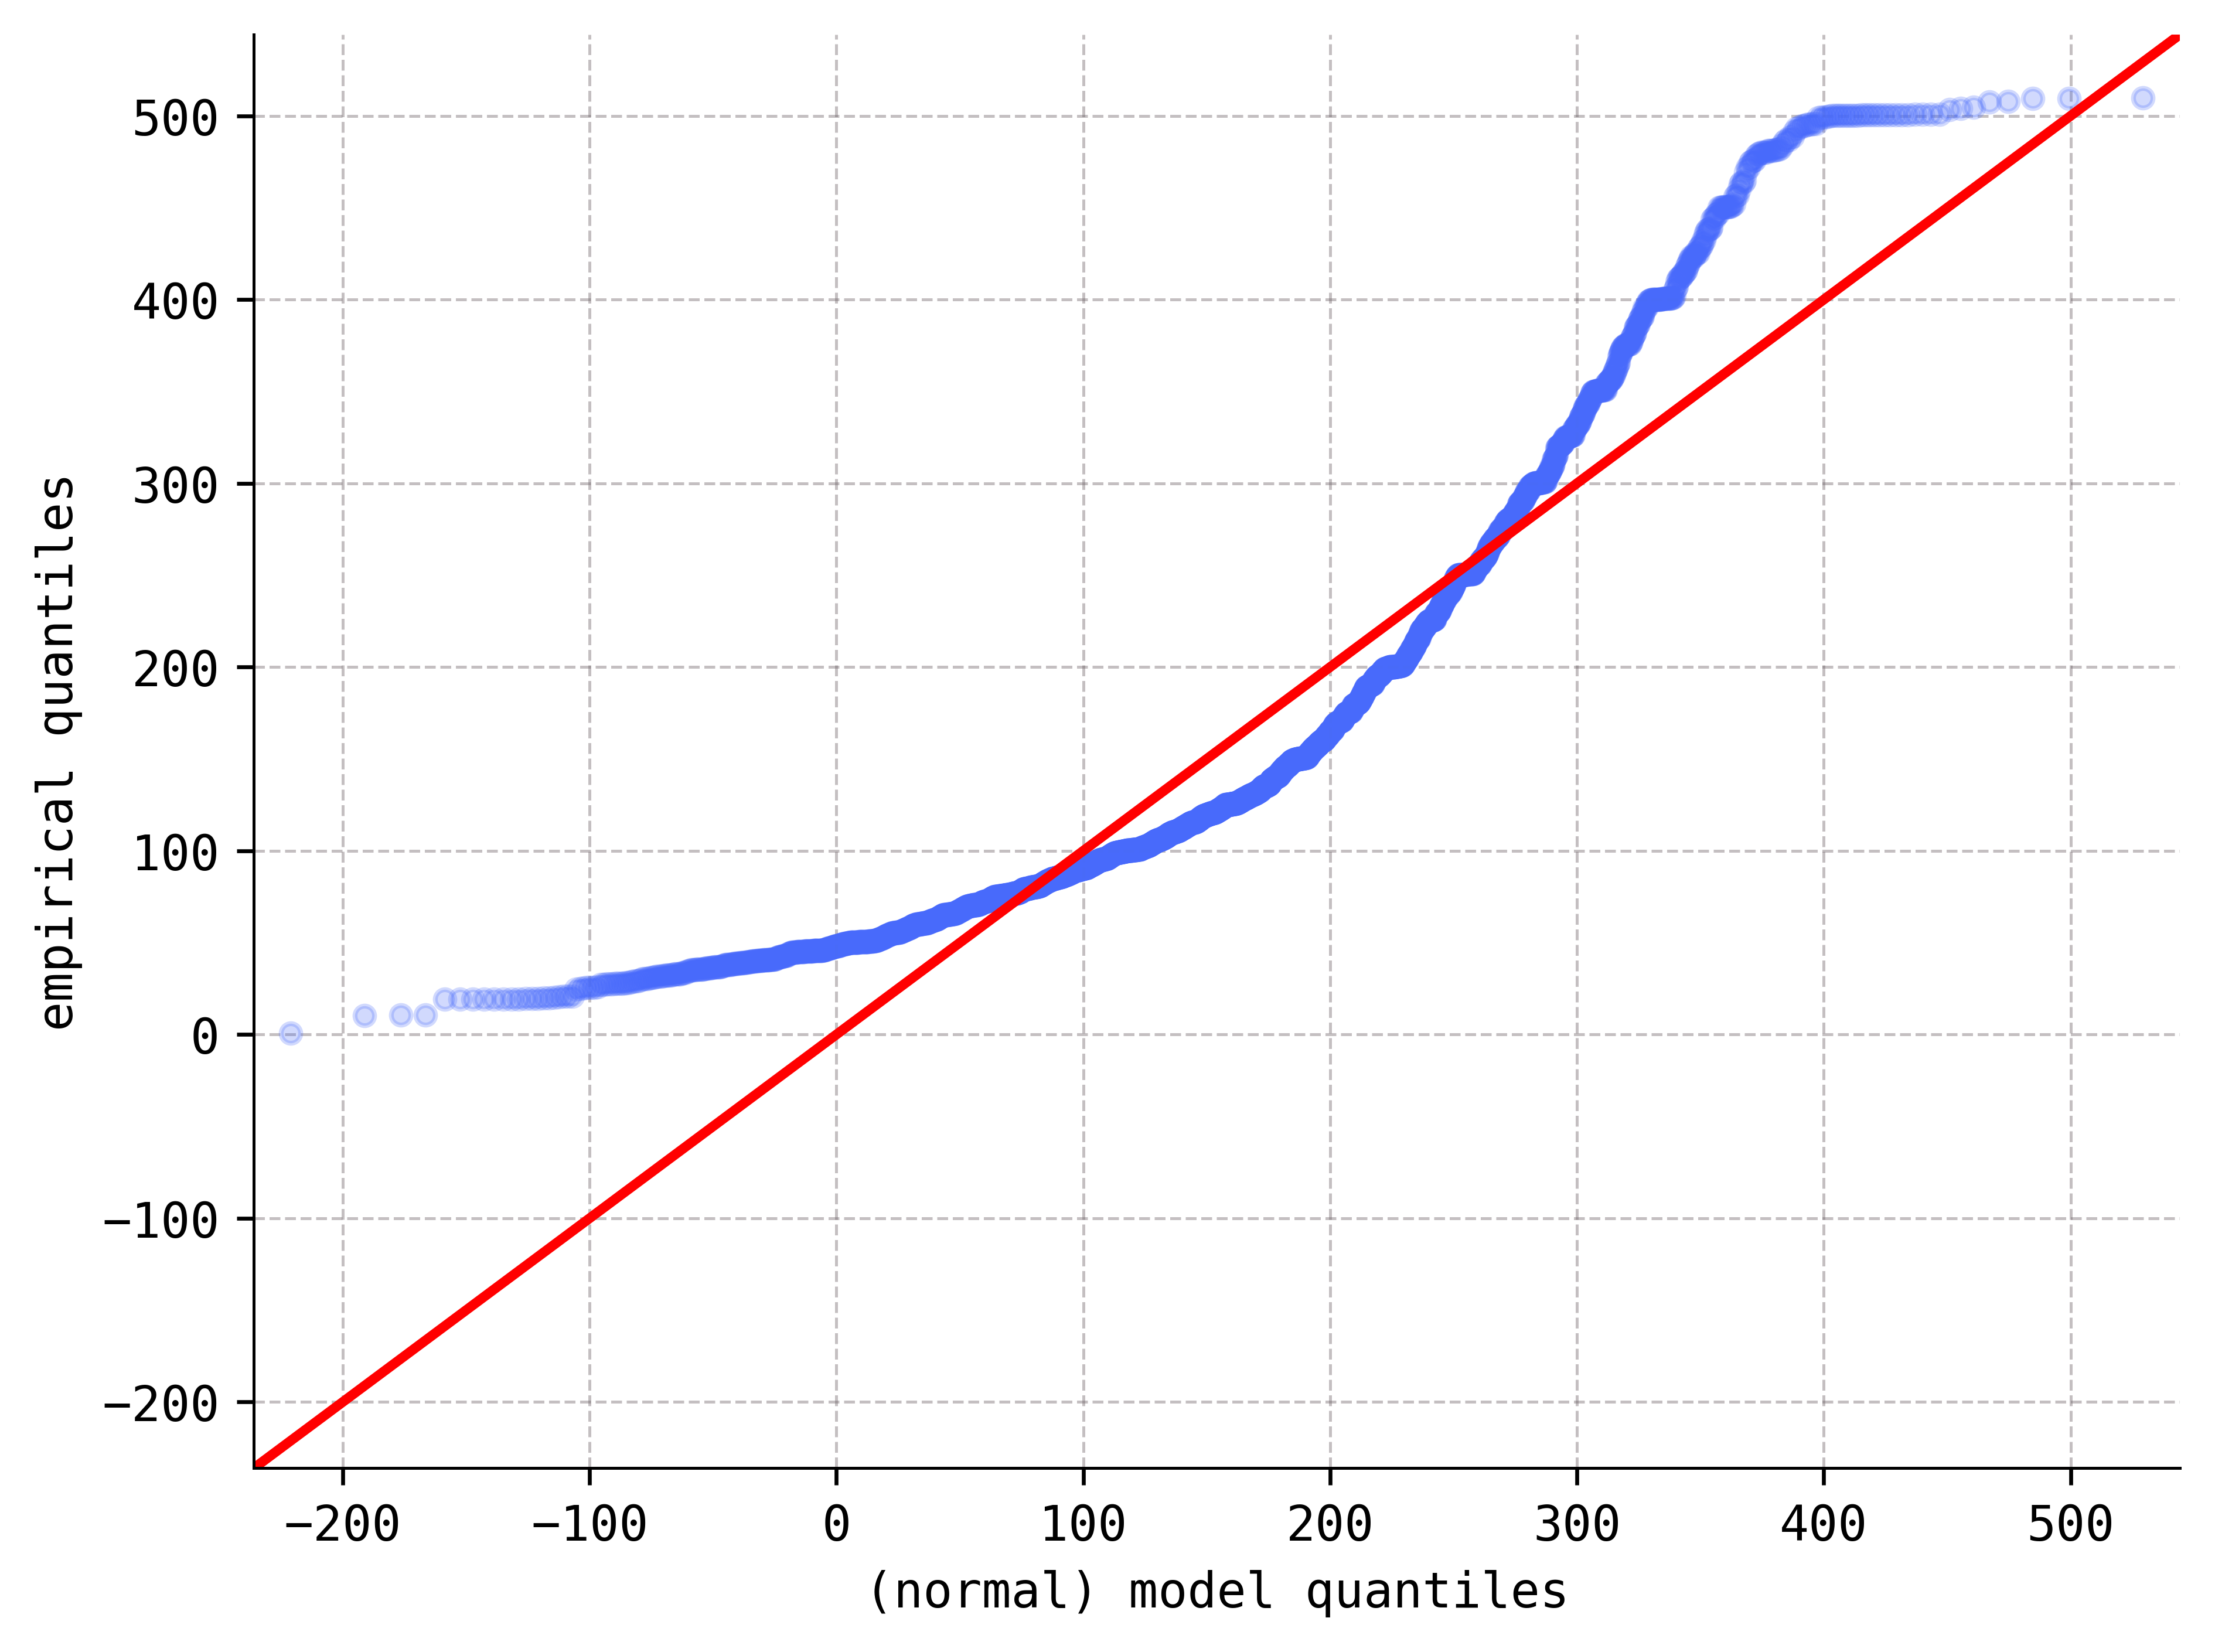

In [13]:
from statsmodels.graphics.gofplots import qqplot

X = sp.stats.norm(loc=srs.mean(), scale=srs.std())

qqplot(data=srs, dist=X, a=0.5, alpha=0.25, line='45')
plt.xlabel('(normal) model quantiles')
plt.ylabel('empirical quantiles')
plt.tight_layout()

How do we interpret this plot? The idea is that, if the model distribution fit the dataset well, then the empirical quantiles should be reasonably close to the model quantiles. One can judge this "reasonable closeness" in the QQ-plot by checking how well the scattered points fit the diagonal red line (which has a slope of $1$, or 45 degrees). So, in our Airbnb example, it is clear that the scattered points are a poor fit for the diagonal line, which suggests our dataset is _not_ accurately modeled by the proposed normal distribution.

But what if we just chose our parameters $\mu$ and $\sigma^2$ poorly, and the dataset is accurately modeled by _another_ normal distribution with different parameters? In particular, what if we thought that the dataset was accurately modeled by a _standard_ normal distribution? Here's the relevant QQ-plot, to test our hypothesis:

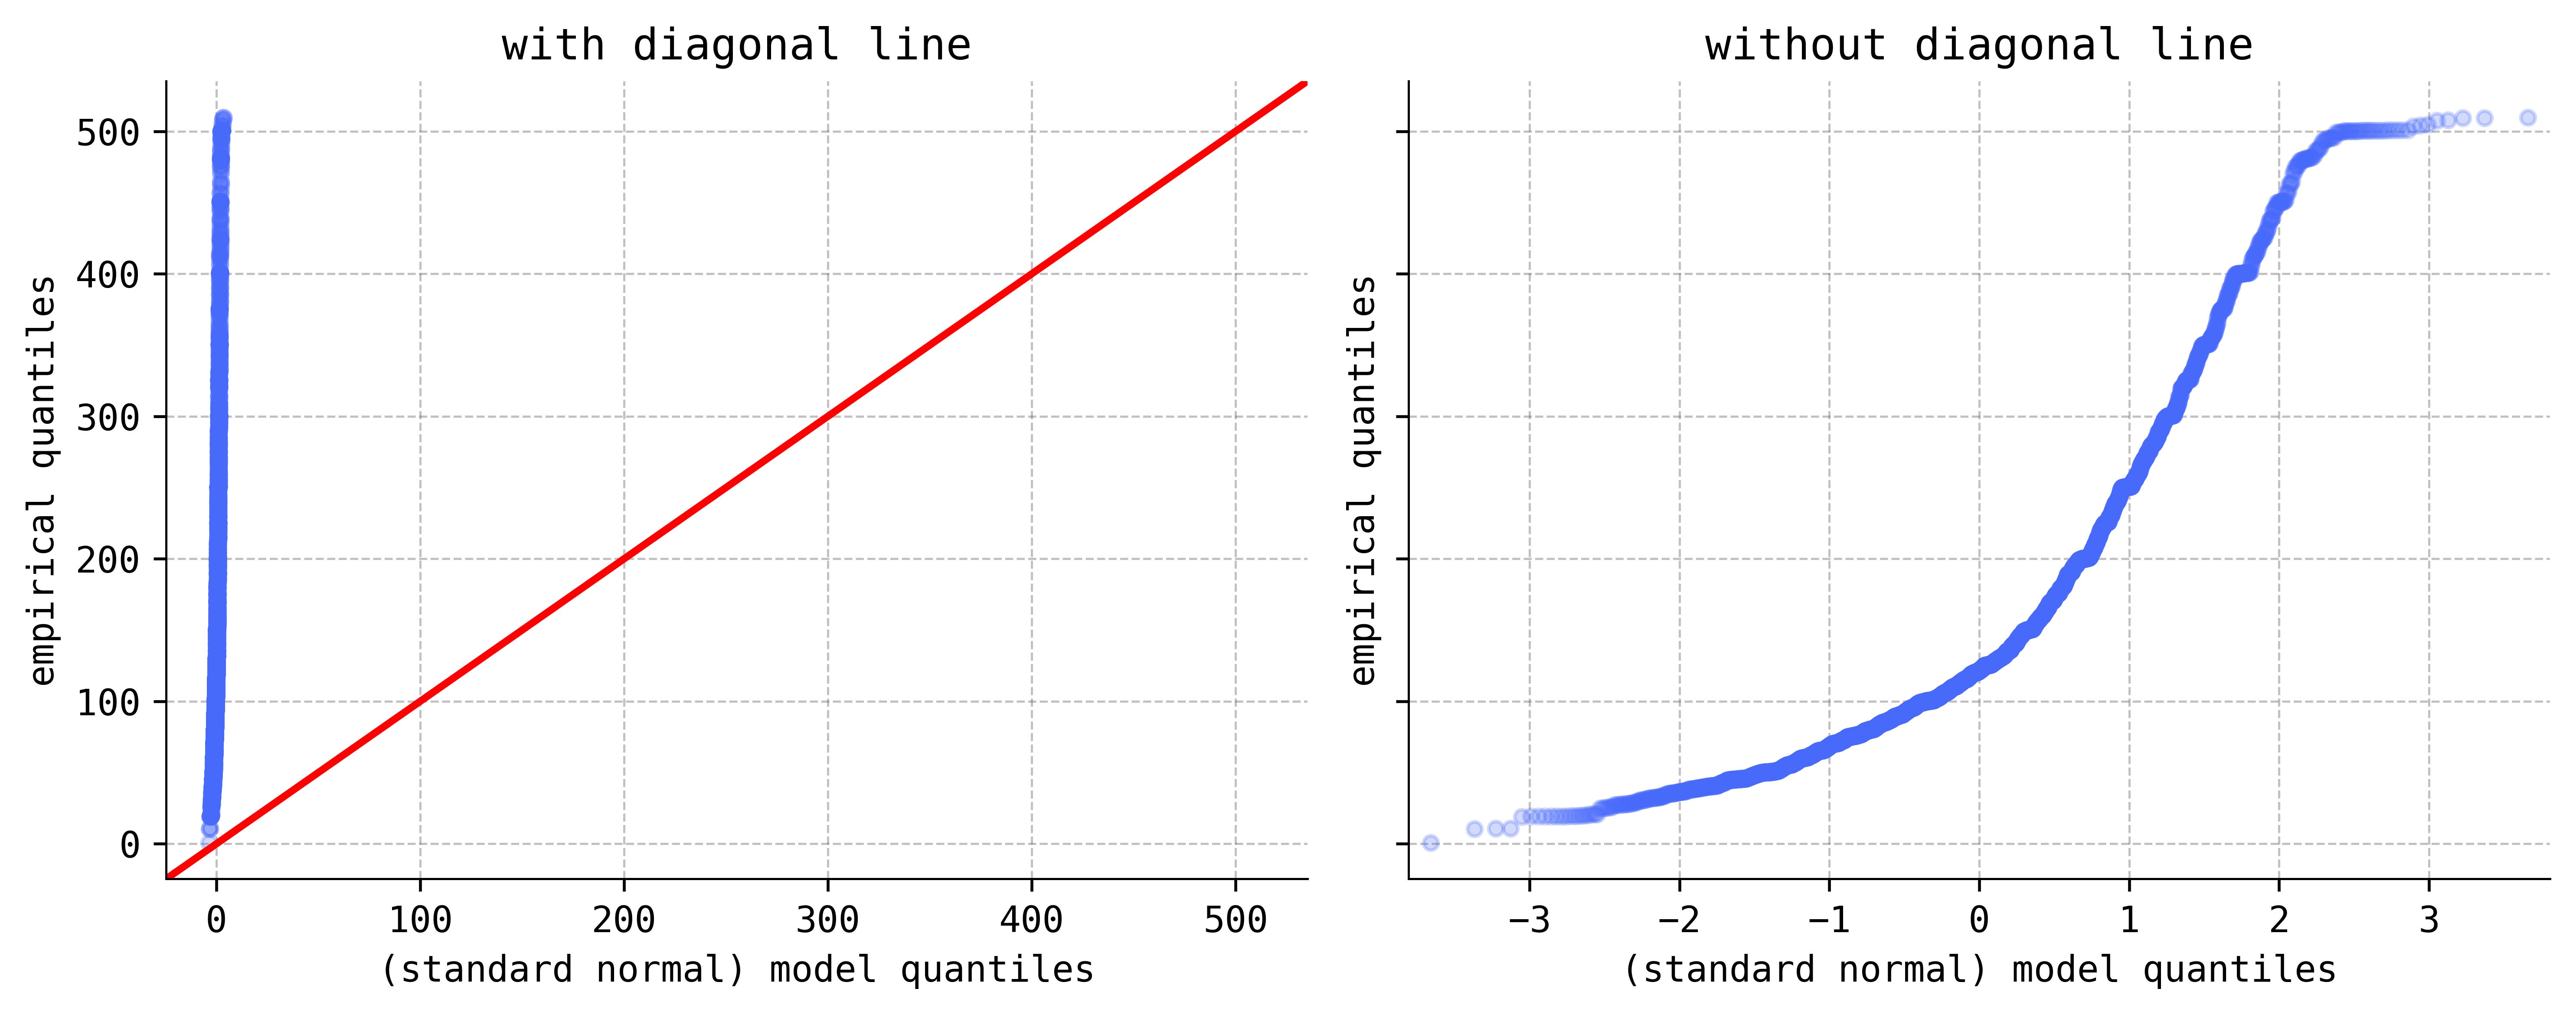

In [14]:
_, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(10, 4))

qqplot(data=srs, a=0.5, alpha=0.25, line='45', ax=axes[0])
qqplot(data=srs, a=0.5, alpha=0.25, ax=axes[1])
axes[0].set_xlabel('(standard normal) model quantiles')
axes[0].set_title('with diagonal line')
axes[0].set_ylabel('empirical quantiles')
axes[1].set_xlabel('(standard normal) model quantiles')
axes[1].set_ylabel('empirical quantiles')
axes[1].set_title('without diagonal line')
plt.tight_layout()

The QQ-plot on the left (with the diagonal line) shows us that we picked an _even worse_ model. The horizontal axis on the QQ-plot on the right has been re-scaled so that the scattered points do not appear to fall along a (nearly) vertical line, as they do in the left-hand plot.

The point I want to illustrate now is that the QQ-plot on the right---without the diagonal line, and with axes on different scales---may be used to judge whether our data is fit well by _some_ normal distribution. Indeed, my goal is to justify the following:

> **Observation**: What we are looking for in the (standard normal) QQ-plot on the right is whether the scattered points fall along _some_ straight line $y = ax + b$ (with $a>0$). If they do, then the data is fit well by the normal distribution $\mathcal{N}(b,a^2)$.

This observation rests upon the fact that affine transformations of normal variables are still normal (which we saw back in {numref}`Chapter %s <examples>`).

To explain, suppose that the points in the QQ-plot fell _exactly_ on a straight line, so that

```{math}
:label: norm-eqn
y_i = ax_i + b, \quad i=1,2,\ldots,m,
```

for some $a$ and $b$ with $a >0$. Then, let

\begin{equation*}
\phi(x) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{x^2}{2}\right)
\end{equation*}

be the density of the standard normal distribution, with associated distribution function

$$
\Phi(x) = \int_{-\infty}^x \phi(t) \ \text{d} t.
$$

Now, if {eq}`norm-eqn` were true, then

```{math}
:label: trans-eqn
\frac{i-1/2}{m} = \Phi\left( \frac{y_i-b}{a} \right) = \int_{-\infty}^{(y_i-b)/a} \phi(t) \ \text{d} t = \int_{-\infty}^{y_i} \frac{1}{a} \phi \left( \frac{s-b}{a}\right) \ \text{d} s,
```

where I made the substitution $t = (s-b)/a$ in going from the first integral to the second. But notice that the transformed function

\begin{equation*}
\frac{1}{a} \phi \left( \frac{x-b}{a}\right) = \frac{1}{a\sqrt{2\pi}} \exp\left[ -\frac{1}{2} \left(\frac{x-b}{a}\right)^2\right]
\end{equation*}

is the density of $\mathcal{N}(b,a^2)$, and so {eq}`trans-eqn` shows that, provided {eq}`norm-eqn` is true, the data point $y_i$ is the $(i-1/2)/m$-quantile of $\mathcal{N}(b,a^2)$. Thus, the empirical quantiles match the (theoretical) model quantiles of $\mathcal{N}(b,a^2)$, which justifies the observation in the box above.

So, the standard normal model is a bad fit---even worse than the first normal model. But remember that the plots of the CDFs and PDFs suggest that the Airbnb dataset is _log-normal_, in the sense that its log transform is well modeled by a normal distribution. To confirm this, let's check a QQ-plot of the log transform against standard normal quantiles:

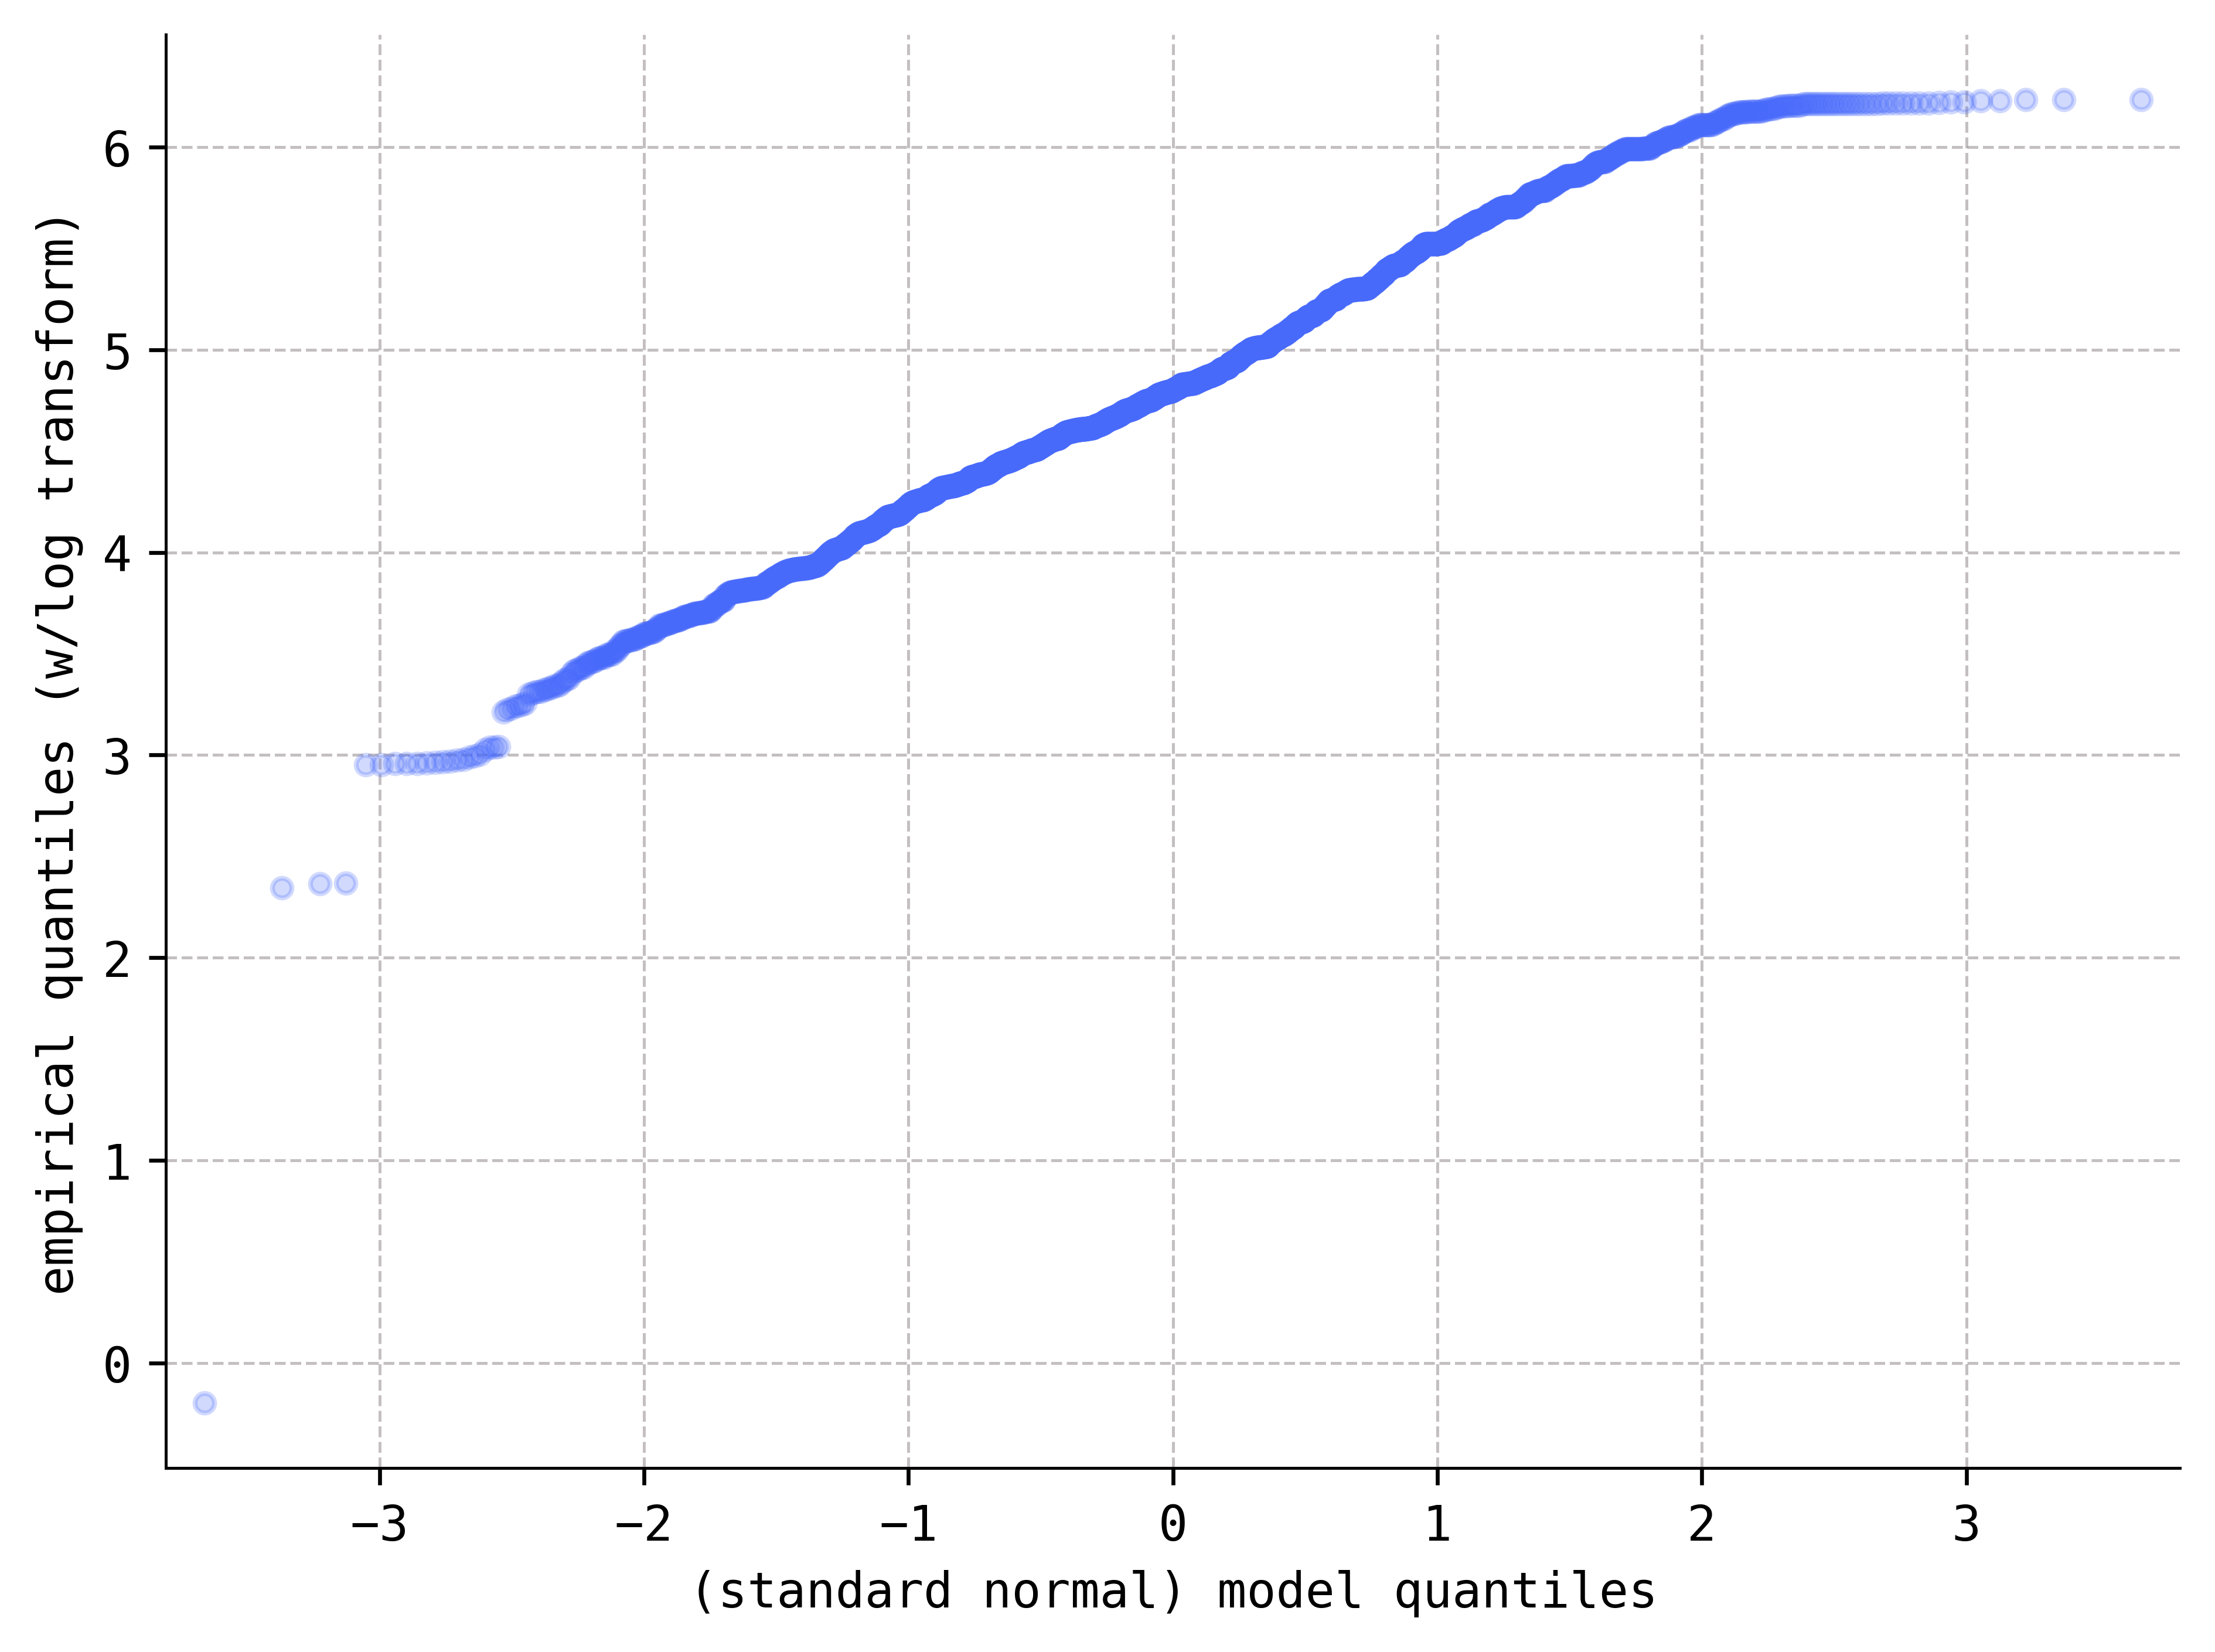

In [15]:
qqplot(data=srs_log, a=0.5, alpha=0.25)
plt.xlabel('(standard normal) model quantiles')
plt.ylabel('empirical quantiles (w/log transform)')
plt.tight_layout()

Remember, we are looking for the data to fall along a straight line. In this plot, it appears that the scattered points fall along the line $y = 0.6x + 4.8$, which I estimated through visual inspection. This suggests that the best-fit normal model should be $\mathcal{N}(4.8, 0.6^2)$. Note how closely these parameter values match the empirical statistics of the log transformed data:

In [16]:
srs_log.rename('log price').describe()

count    3972.000000
mean        4.835900
std         0.644223
min        -0.198451
25%         4.421728
50%         4.800367
75%         5.295614
max         6.233999
Name: log price, dtype: float64

## Box plots and violin plots

We finish the chapter with a discussion of two more methods to visualize datasets and empirical distributions. To begin, let's consider our Airbnb data and all the empirical statistics that we described and computed in the previous sections. We may combine all this information in something called a _box plot_ (or _box and whisker plot_):

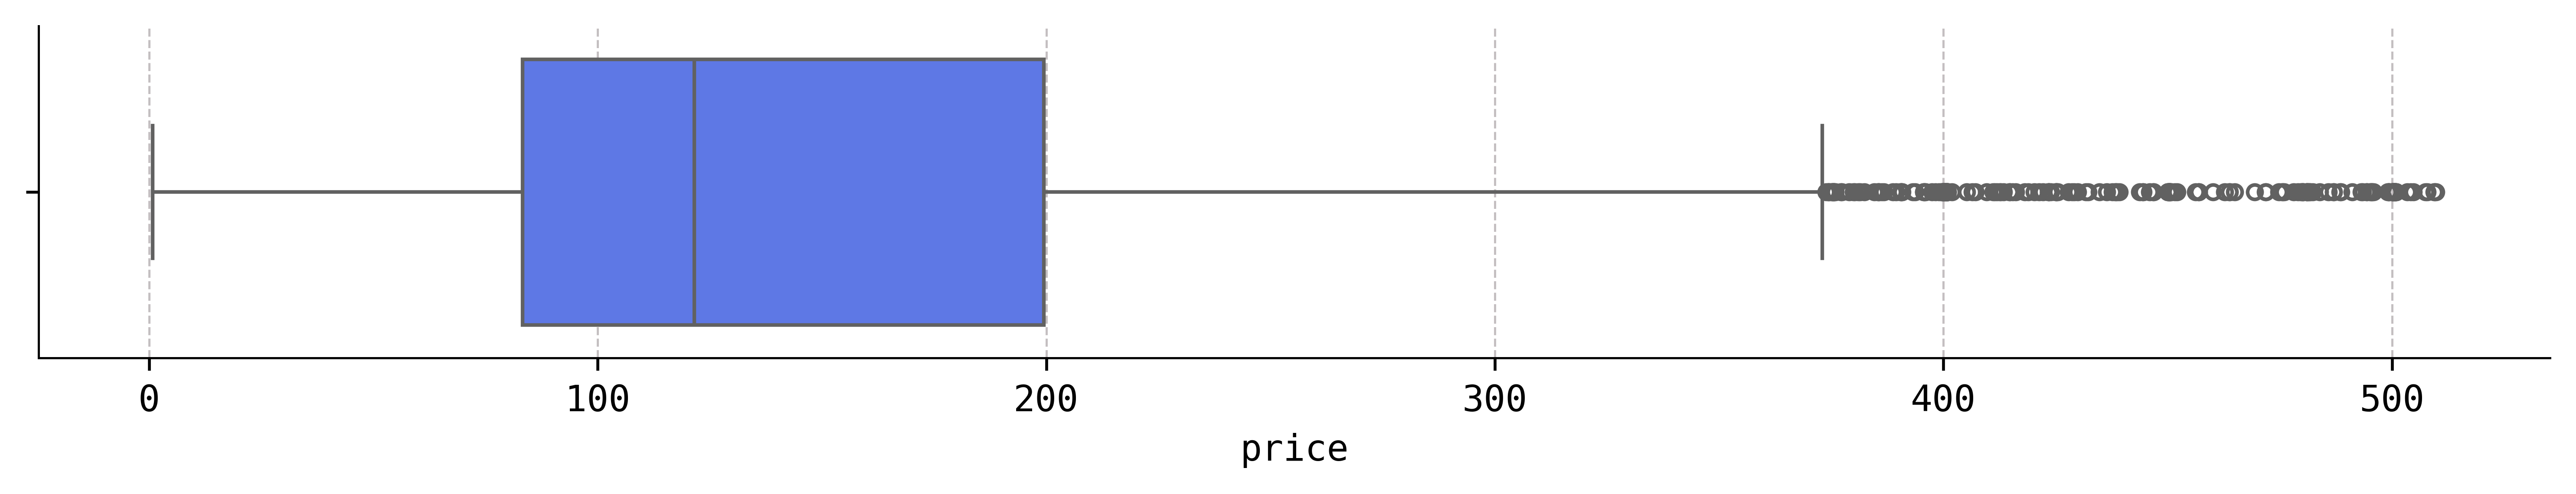

In [17]:
sns.boxplot(x=srs)
plt.xlabel('price')
plt.gcf().set_size_inches(w=10, h=2)
plt.tight_layout()

The left edge of the blue box is at $x=83.24$, which is the empirical $0.25$-quantile or first quartile; its right edge is at $x=199.46$, which is the empirical 0.75-quantile or third quartile. Therefore, the _width_ of the box is exactly the empirical IQR. The box thus represents where the middle 50% of the dataset lives. The vertical line through the box is at $x=121.56$, which is the empirical 0.5-quantile or the empirical median.

You notice that the box has "whiskers." In general, the left whisker in a box plot either extends out to the minimum value in the dataset _or_ to the threshold value

\begin{equation*}
(\text{empirical 0.25-quantile}) - 1.5\times (\text{empirical IQR})
\end{equation*}

for determining outliers, whichever is greater. In the case of our Airbnb data, the whisker extends to the minimum value at $x=0.82$ (82 cents---really?).

Likewise, the right whisker in general either extends out to the maximum value in the dataset _or_ to the upper threshold value

\begin{equation*}
(\text{empirical 0.75-quantile}) + 1.5\times (\text{empirical IQR})
\end{equation*}

for determining outliers, whichever is smaller. In the case of our Airbnb data, the dataset _does_ contain outliers in its upper tail, so the whisker extends to the threshold value, and all the dots to the right are outliers.

Now, what were to happen if we combined a box plot and a KDE? We'd get something like this:

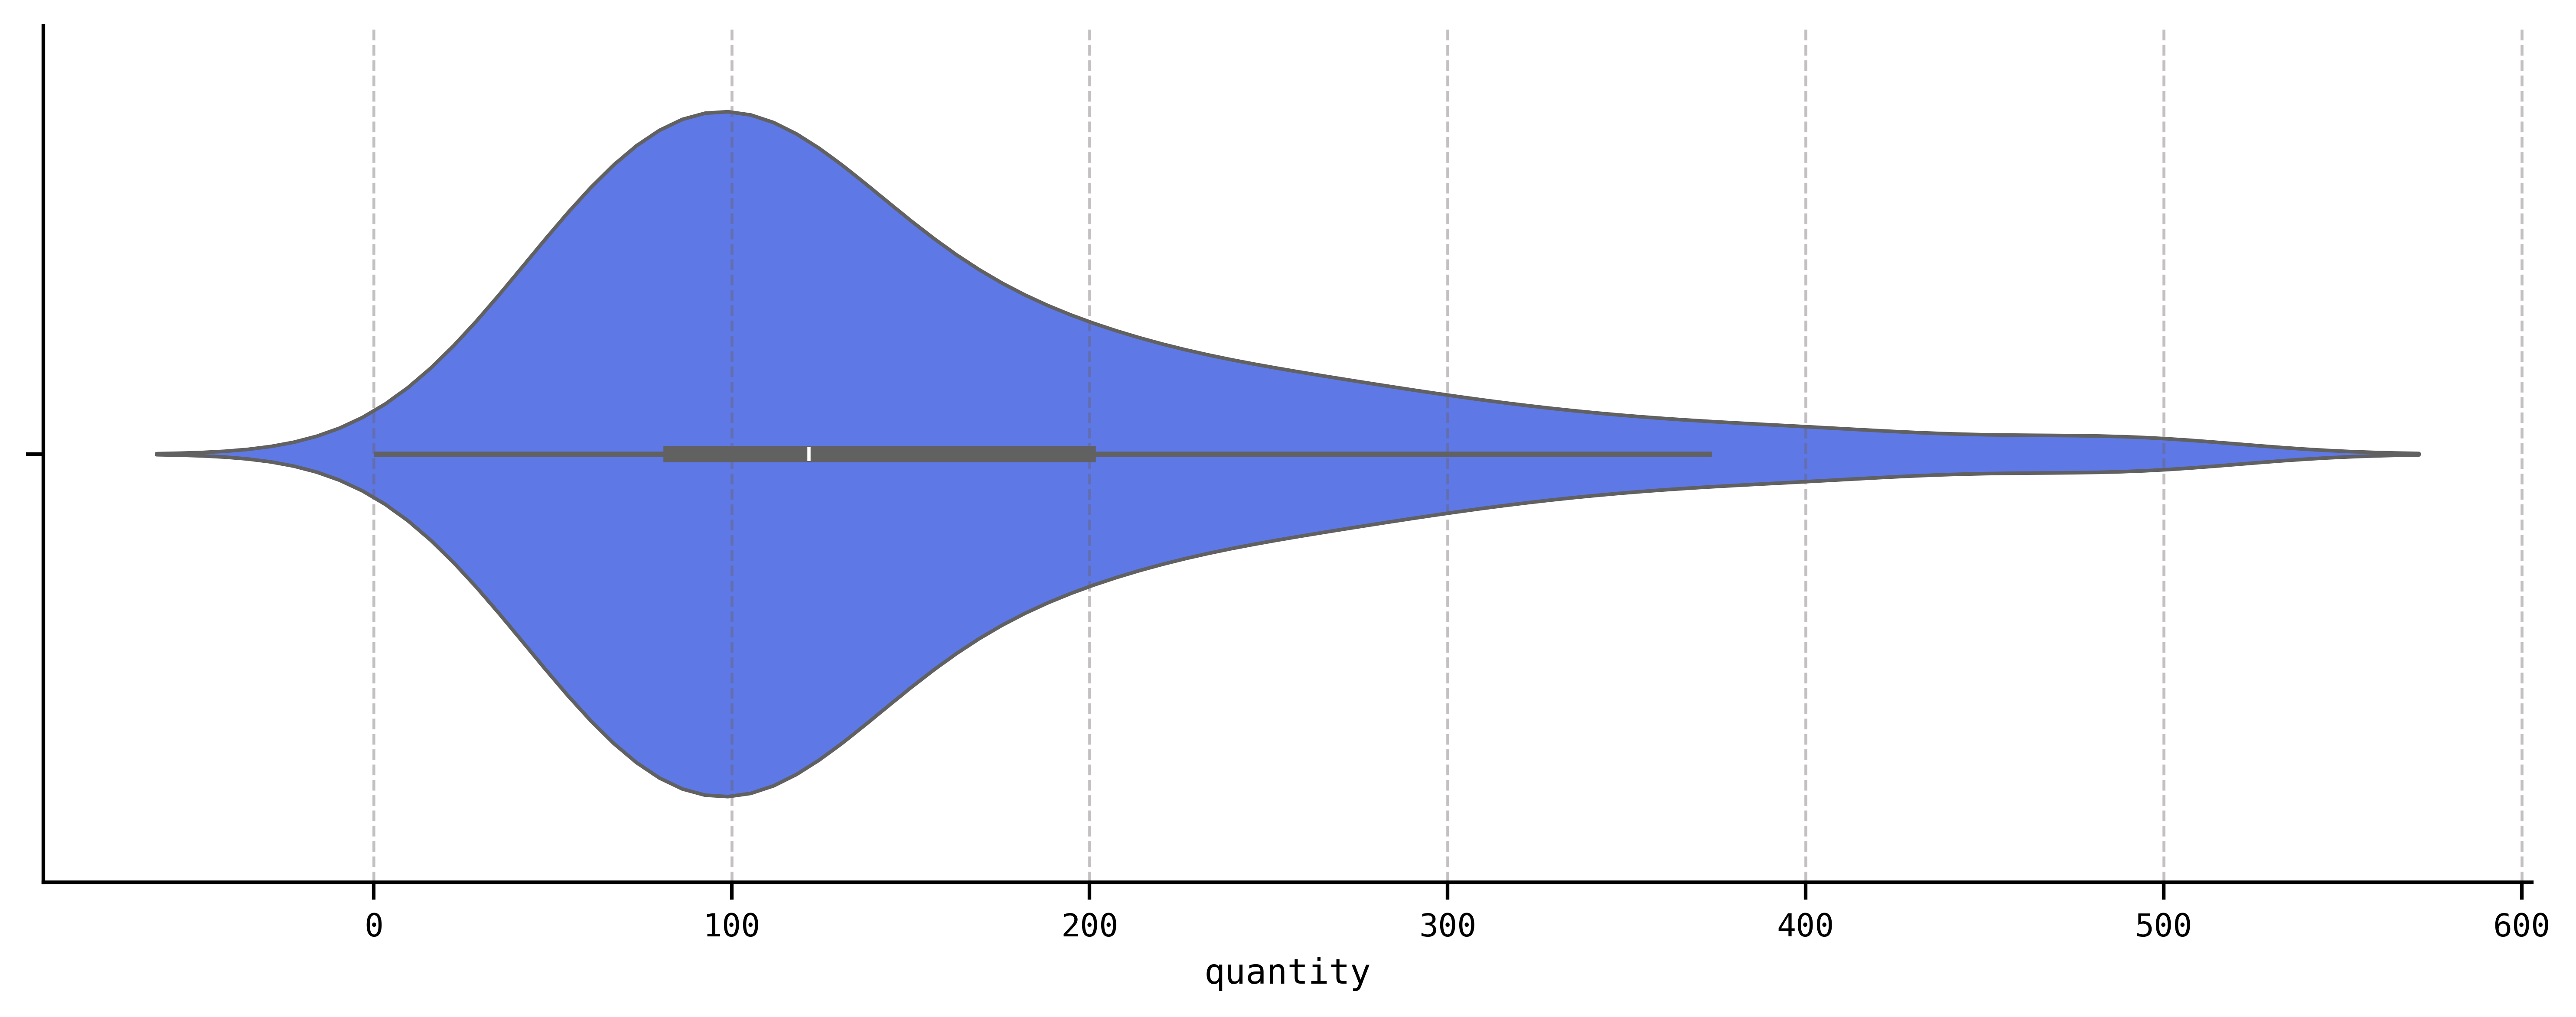

In [18]:
sns.set_context('paper')
sns.violinplot(x=srs, bw=0.3)
plt.xlabel('quantity')
plt.gcf().set_size_inches(w=10, h=4)
plt.tight_layout()

This is a _violin plot_---the reason for the name is evident. Along the central horizontal line is a box plot---can you see it? The white dot in the box represents the empirical median, while you can see the upper and lower whiskers as well. Then, above the central horizontal line is displayed a KDE of the dataset, and its mirror image is displayed below. For comparison, here's a picture of a KDE of the dataset all on its own:

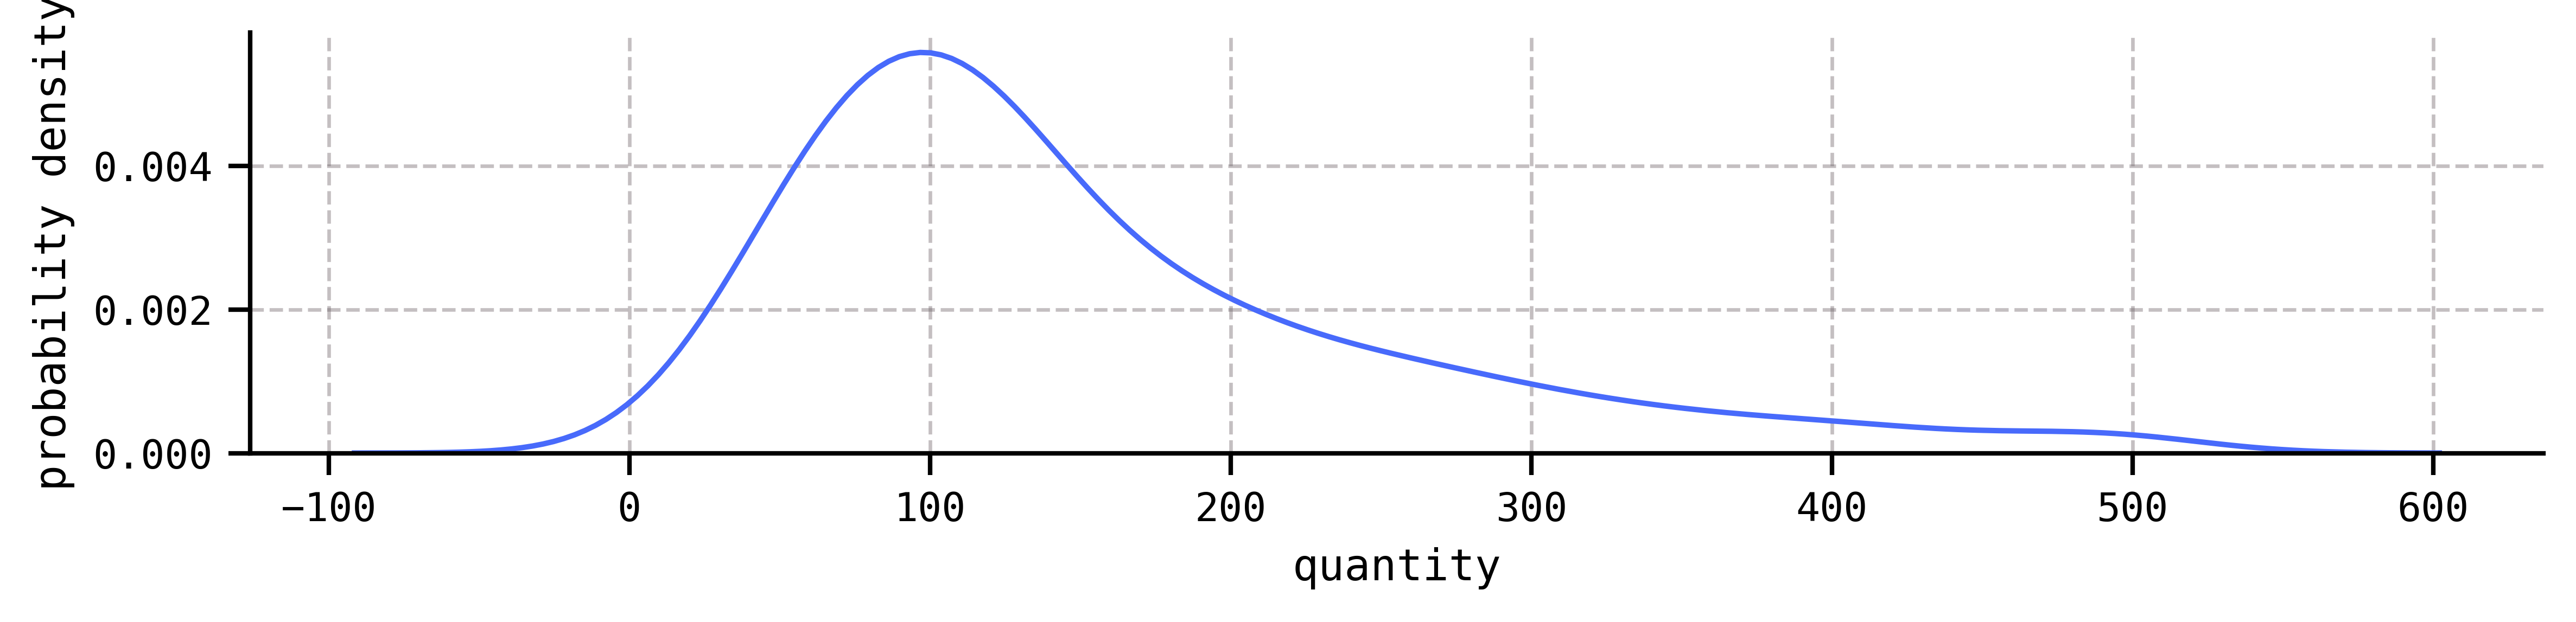

In [19]:
sns.kdeplot(x=srs, bw_method=0.3)
plt.gcf().set_size_inches(w=8, h=2)
plt.xlabel('quantity')
plt.ylabel('probability density')
plt.tight_layout()

So, violin plots are tools belonging to both graphical and numerical exploratory data analysis since they combine KDEs with box plots. They have advantages over just plain box plots because they are better able to convey a sense of the _shape_ of a dataset. For example, box plots cannot display multiple data modes (multiple peaks in the distribution), whereas KDEs _can_.